In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
import random
import folium
from folium.plugins import MarkerCluster
from IPython.display import display, HTML
from folium.plugins import HeatMap
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
import io
# 
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# from sklearn.base import BaseEstimator, TransformerMixin

color = sns.color_palette()


# tf and keras
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


In [12]:
# MY NOTES

# familiarity with columns 
# display data type for each column 
# summary statistics for num columns 
# generate summary statistics for cat columns (unique values, freq distribution)

# count of missing values per column 
# visualize missing values using heatmaps or bar charts 

# investigate patterns or correlations in missing data 

# TURN YEAR BUILT TO NUMBER: by 2016 - YEAR BUILT 

# check for duplicate rows (parcelid)

# handle or remove duplicate values (dedupe)

# outliers detection 
# decide on how to handle outliers (remove or transform)

# FEATURE ENGINERRING 
# use the imputer using a well defined strategy 

# CATEGORICAL TEXT BASED FIELDS 
# create one-hot encoding array for text based and categorical attributes 
# either by setting the sparse to zero when creating it 
# OneHotEncoder class to convert categorical values into one-hot vectors:
# from sklearn.preprocessing import OneHotEncoder
# set sparse=False when creating the OneHotEncoder, 
# in which case the transform() method will return a regular (dense) NumPy array directly.


# Feature Scaling 
# min-max scaling or standardization.
#As with all estimators, 
# it is important to fit the scalers to the 
# train‐ ing data only: 
# never use fit() or fit_transform() for anything else than the training set. 
# Once you have a trained scaler, you can then use it to transform() any other set, 
# including the validation set, the test set, and new data. 
# Note that while the training set values will always be scaled to the specified range,
# if new data contains outliers, these may end up scaled outside the range. 
# If you want to avoid this, just set the clip hyperparameter to True.
# standardization is much less affected by outliers
# efore you scale the feature, you should first transform it to shrink the heavy tail,
# and if possible to make the distribution roughly symmetrical

In [13]:
# base path
base_path = "./data/"

# Read data
properties_2016 = pd.read_csv(f'{base_path}properties_2016.csv')
properties_2017 = pd.read_csv(f'{base_path}properties_2017.csv')
train_2016 = pd.read_csv(f'{base_path}train_2016_v2.csv')
train_2017 = pd.read_csv(f'{base_path}train_2017.csv')


# Concatenate train datasets
df_logs = pd.concat([train_2016, train_2017])

# Concatenate properties datasets
properties = pd.concat([properties_2016, properties_2017])

# Merge train data with properties data
df = pd.merge(df_logs, properties, on='parcelid', how='inner')

# Convert transactiondate to datetime
df['transactiondate'] = pd.to_datetime(df['transactiondate'])
# Perform train_test_split with shuffle=False to maintain order
train_df, valid_df = train_test_split(df, test_size=0.2, shuffle=False)

/var/folders/m3/jn87_n2s6cnbxdsks7gkhs7m0000gn/T/ipykernel_10160/1524778203.py:5: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2016 = pd.read_csv(f'{base_path}properties_2016.csv')
/var/folders/m3/jn87_n2s6cnbxdsks7gkhs7m0000gn/T/ipykernel_10160/1524778203.py:6: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2017 = pd.read_csv(f'{base_path}properties_2017.csv')


In [14]:
# a look at the shape of properties
properties_2016

parcelid  airconditioningtypeid  architecturalstyletypeid  \
0         10754147                    NaN                       NaN   
1         10759547                    NaN                       NaN   
2         10843547                    NaN                       NaN   
3         10859147                    NaN                       NaN   
4         10879947                    NaN                       NaN   
...            ...                    ...                       ...   
2985212  168176230                    NaN                       NaN   
2985213   14273630                    NaN                       NaN   
2985214  168040630                    NaN                       NaN   
2985215  168040830                    NaN                       NaN   
2985216  168040430                    NaN                       NaN   

         basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0                 NaN          0.0         0.0                  NaN   
1                 NaN          0.0         0.0                  NaN   
2                 NaN          0.0         0.0                  NaN   
3                 NaN          0.0         0.0                  3.0   
4                 NaN          0.0         0.0                  4.0   
...               ...          ...         ...                  ...   
2985212           NaN          NaN         NaN                  NaN   
2985213           NaN          NaN         NaN                  NaN   
2985214           NaN          NaN         NaN                  NaN   
2985215           NaN          NaN         NaN                  NaN   
2985216           NaN          NaN         NaN                  NaN   

         buildingqualitytypeid  calculatedbathnbr  decktypeid  \
0                          NaN                NaN         NaN   
1                          NaN                NaN         NaN   
2                          NaN                NaN         NaN   
3                          7.0                NaN         NaN   
4                          NaN                NaN         NaN   
...                        ...                ...         ...   
2985212                    NaN                NaN         NaN   
2985213                    NaN                NaN         NaN   
2985214                    NaN                NaN         NaN   
2985215                    NaN                NaN         NaN   
2985216                    NaN                NaN         NaN   

         finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
0                             NaN                           NaN   
1                             NaN                           NaN   
2                             NaN                       73026.0   
3                             NaN                        5068.0   
4                             NaN                        1776.0   
...                           ...                           ...   
2985212                       NaN                           NaN   
2985213                       NaN                           NaN   
2985214                       NaN                           NaN   
2985215                       NaN                           NaN   
2985216                       NaN                           NaN   

         finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
0                         NaN                   NaN                   NaN   
1                         NaN                   NaN                   NaN   
2                         NaN                   NaN               73026.0   
3                         NaN                   NaN                5068.0   
4                         NaN                   NaN                1776.0   
...                       ...                   ...                   ...   
2985212                   NaN                   NaN                   NaN   
2985213                   NaN                   NaN                   NaN   
2985214                  

In [15]:
print("a look at the columns of the dataset")
train_df.info()

a look at the columns of the dataset
<class 'pandas.core.frame.DataFrame'>
Index: 268620 entries, 0 to 268619
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   parcelid                      268620 non-null  int64         
 1   logerror                      268620 non-null  float64       
 2   transactiondate               268620 non-null  datetime64[ns]
 3   airconditioningtypeid         85865 non-null   float64       
 4   architecturalstyletypeid      776 non-null     float64       
 5   basementsqft                  140 non-null     float64       
 6   bathroomcnt                   268518 non-null  float64       
 7   bedroomcnt                    268518 non-null  float64       
 8   buildingclasstypeid           57 non-null      float64       
 9   buildingqualitytypeid         171490 non-null  float64       
 10  calculatedbathnbr             265705 non-null  f

In [16]:
import plotly.graph_objects as go

# Data summary
data_summary = [
    ["Dataset", "Records", "Columns"],
    ["Properties 2016", "2,985,217", "58"],
    ["Properties 2017", "2,985,217", "58"],
    ["Train 2016", "90,275", "3"],
    ["Train 2017", "77,613", "3"],
    ["Combined Properties 2016 & 2017", "5,970,434", "58"],
    ["Merged Data & Train", "335,776", "60"]
]

# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=data_summary[0],
                fill_color='paleturquoise',
                align='left',
                font=dict(size=14, color='black')),
    cells=dict(values=[list(i) for i in zip(*data_summary[1:])],
               fill_color='lavender',
               align='left',
               font=dict(size=12, color='black'))
)])

fig.update_layout(
    title={
        'text': "Data Summary",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    width=800,
    height=400
)

# Display the figure
fig.show()


# Missing Values

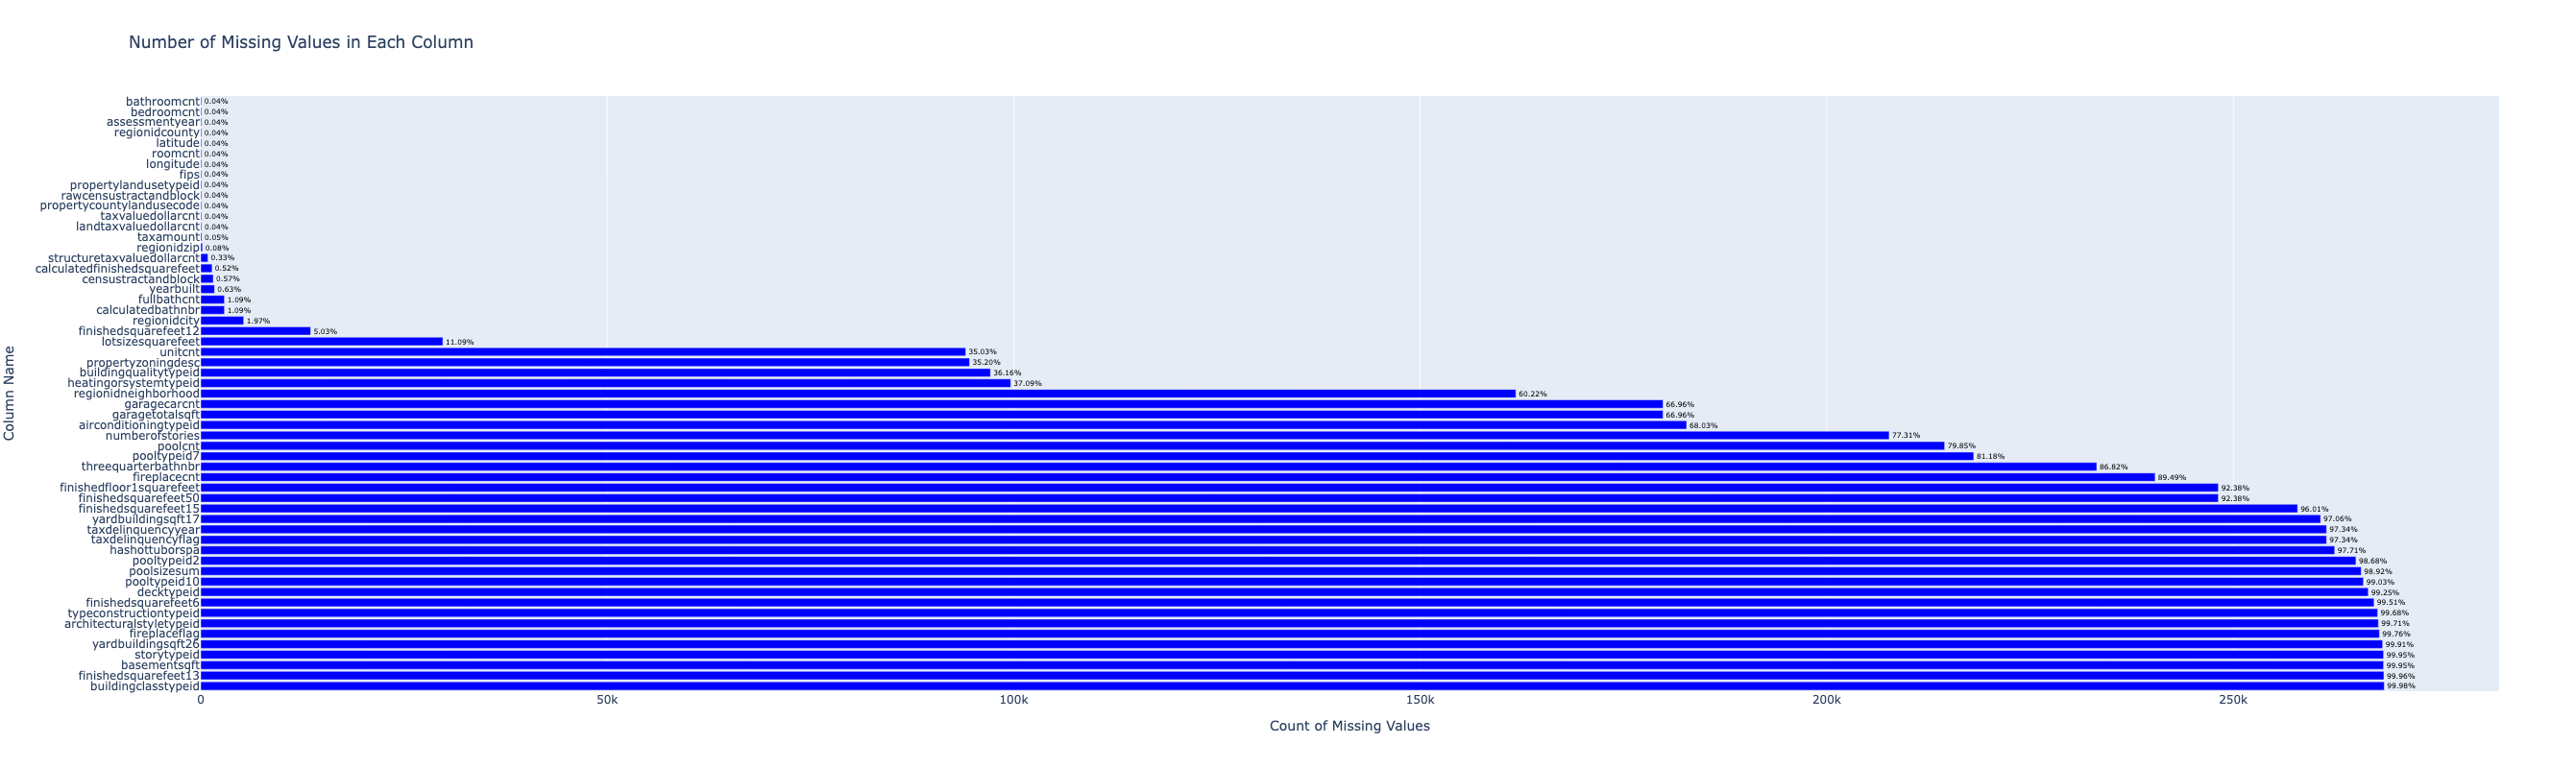

In [18]:
# Calculate the missing values and their percentages correctly
missing_df = train_df.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count'] > 0]
missing_df['missing_percentage'] = (missing_df['missing_count'] / train_df.shape[0]) * 100
missing_df = missing_df.sort_values(by='missing_count', ascending=False)

# Create a bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    y=missing_df['column_name'],
    x=missing_df['missing_count'],
    text=missing_df['missing_percentage'].apply(lambda x: f'{x:.2f}%'),
    textposition='outside',
    orientation='h',
    marker=dict(color='blue'),
    textfont=dict(size=14, color='black')  # Increase the font size and set color
))

fig.update_layout(
    title='Number of Missing Values in Each Column',
    xaxis_title='Count of Missing Values',
    yaxis_title='Column Name',
    yaxis=dict(tickmode='linear'),
    height=800,
)

fig.show()

In [19]:
for index, row in missing_df.iterrows():
    print(f"Column: {row['column_name']}, Missing Percentage: {row['missing_percentage']:.2f}%")

Column: buildingclasstypeid, Missing Percentage: 99.98%
Column: finishedsquarefeet13, Missing Percentage: 99.96%
Column: basementsqft, Missing Percentage: 99.95%
Column: storytypeid, Missing Percentage: 99.95%
Column: yardbuildingsqft26, Missing Percentage: 99.91%
Column: fireplaceflag, Missing Percentage: 99.76%
Column: architecturalstyletypeid, Missing Percentage: 99.71%
Column: typeconstructiontypeid, Missing Percentage: 99.68%
Column: finishedsquarefeet6, Missing Percentage: 99.51%
Column: decktypeid, Missing Percentage: 99.25%
Column: pooltypeid10, Missing Percentage: 99.03%
Column: poolsizesum, Missing Percentage: 98.92%
Column: pooltypeid2, Missing Percentage: 98.68%
Column: hashottuborspa, Missing Percentage: 97.71%
Column: taxdelinquencyflag, Missing Percentage: 97.34%
Column: taxdelinquencyyear, Missing Percentage: 97.34%
Column: yardbuildingsqft17, Missing Percentage: 97.06%
Column: finishedsquarefeet15, Missing Percentage: 96.01%
Column: finishedsquarefeet50, Missing Percen

# Distribution of Columns data before applying any feature engineering

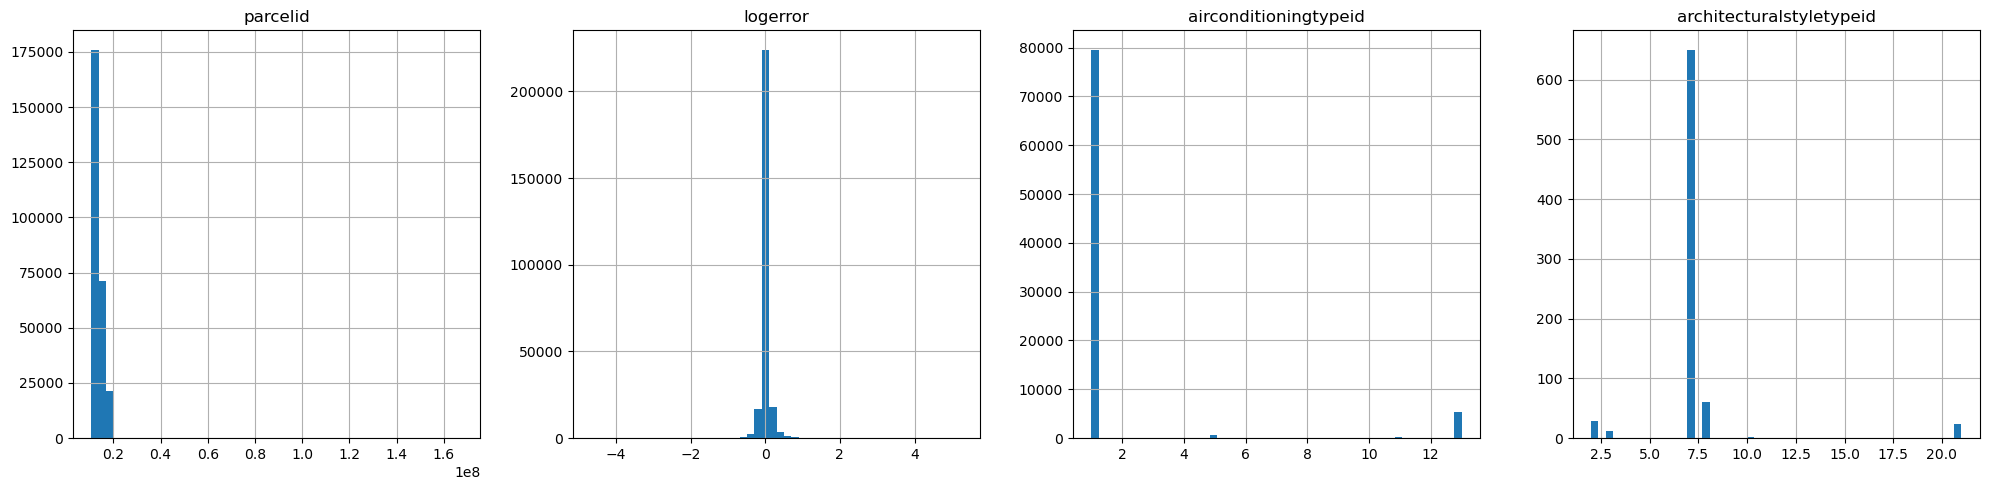

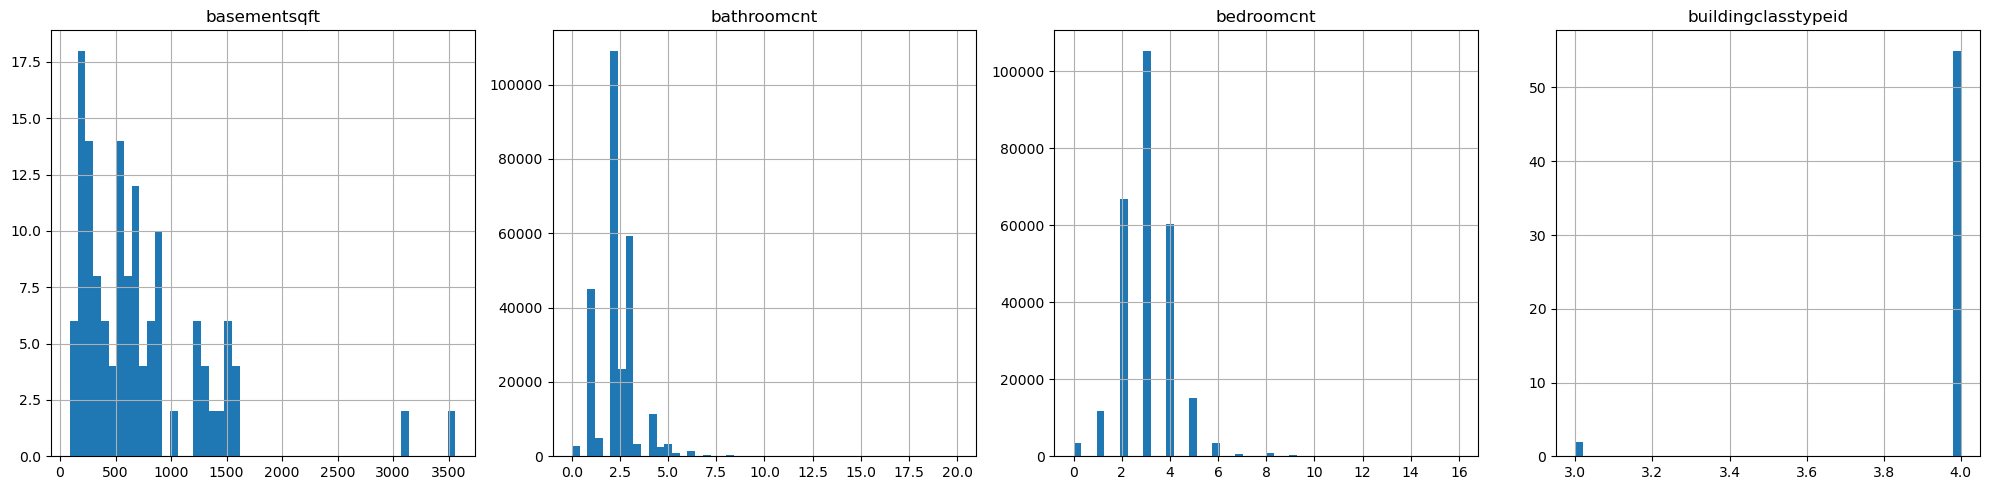

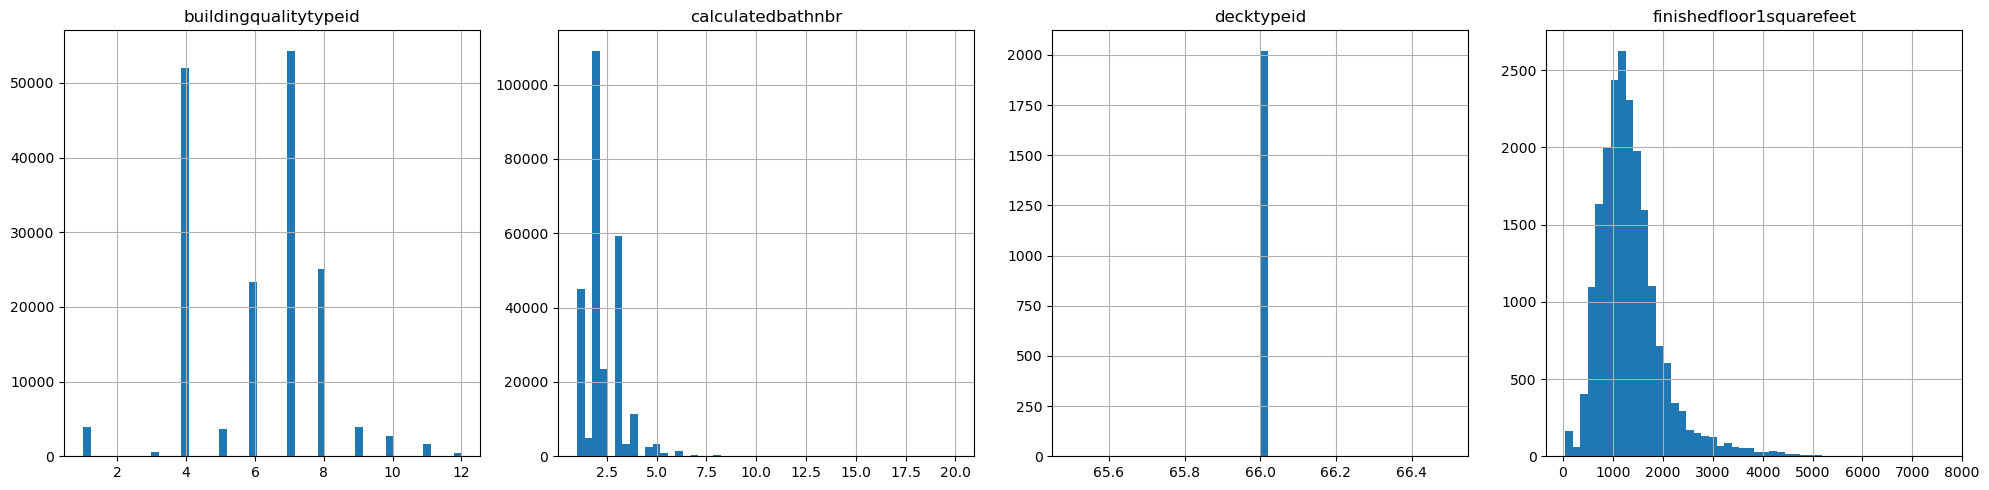

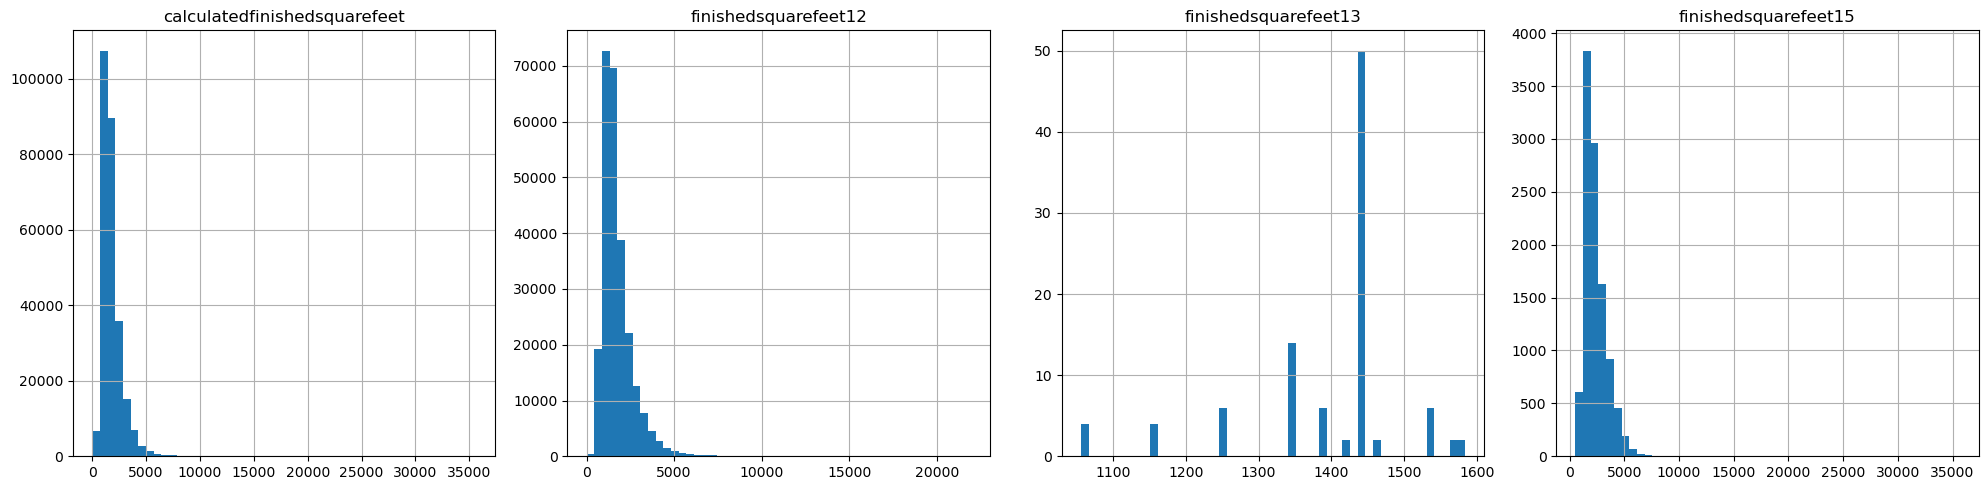

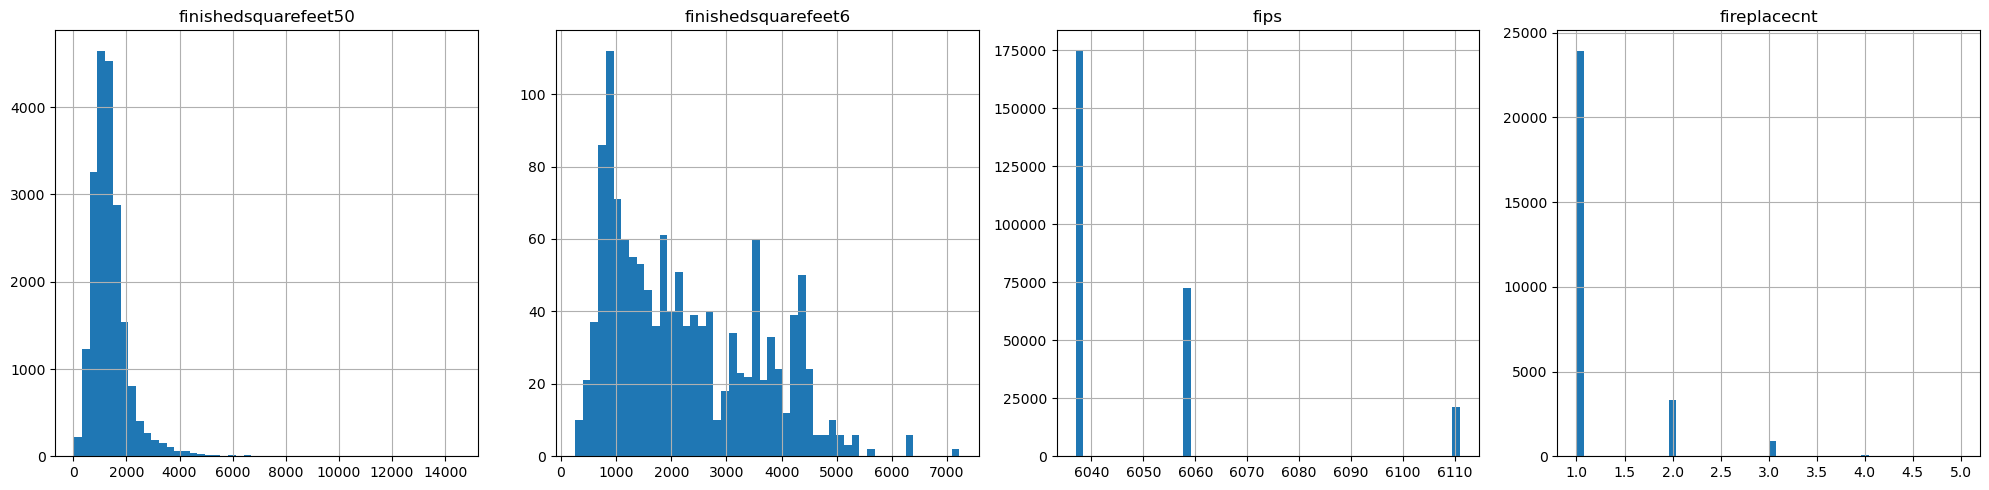

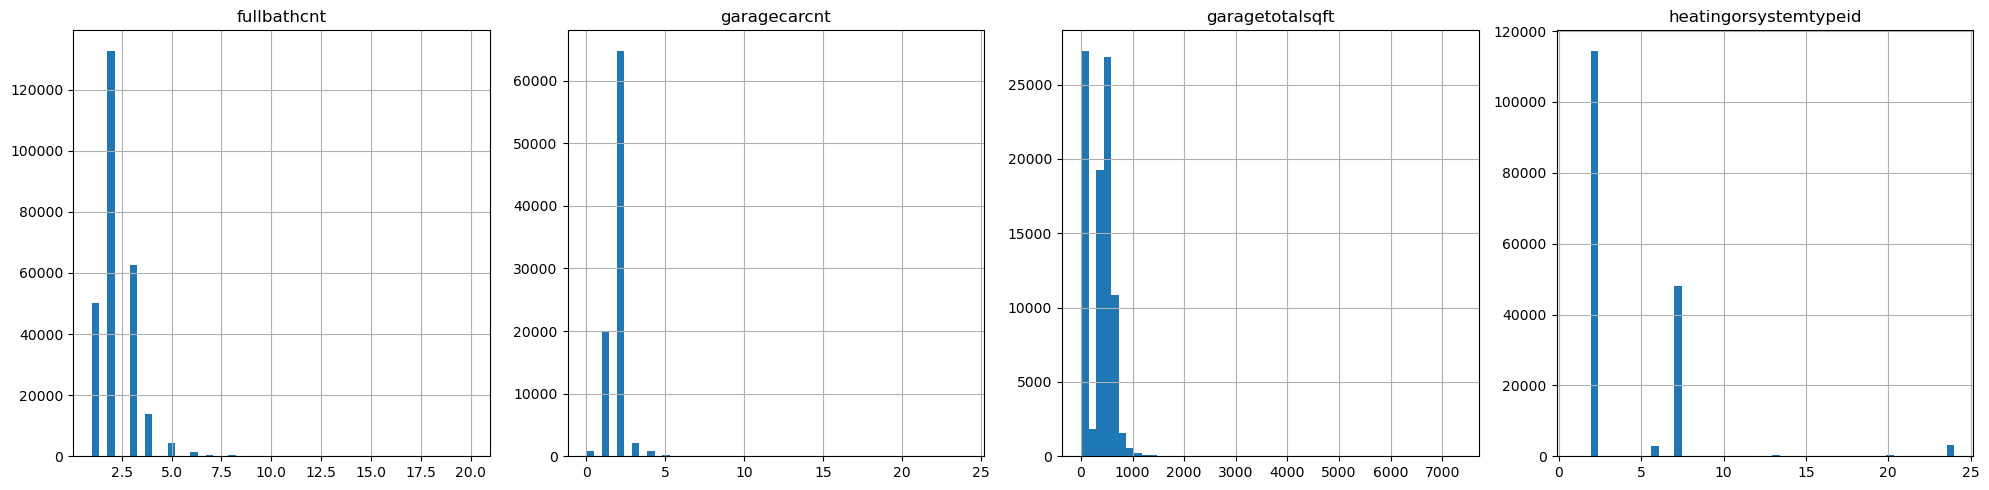

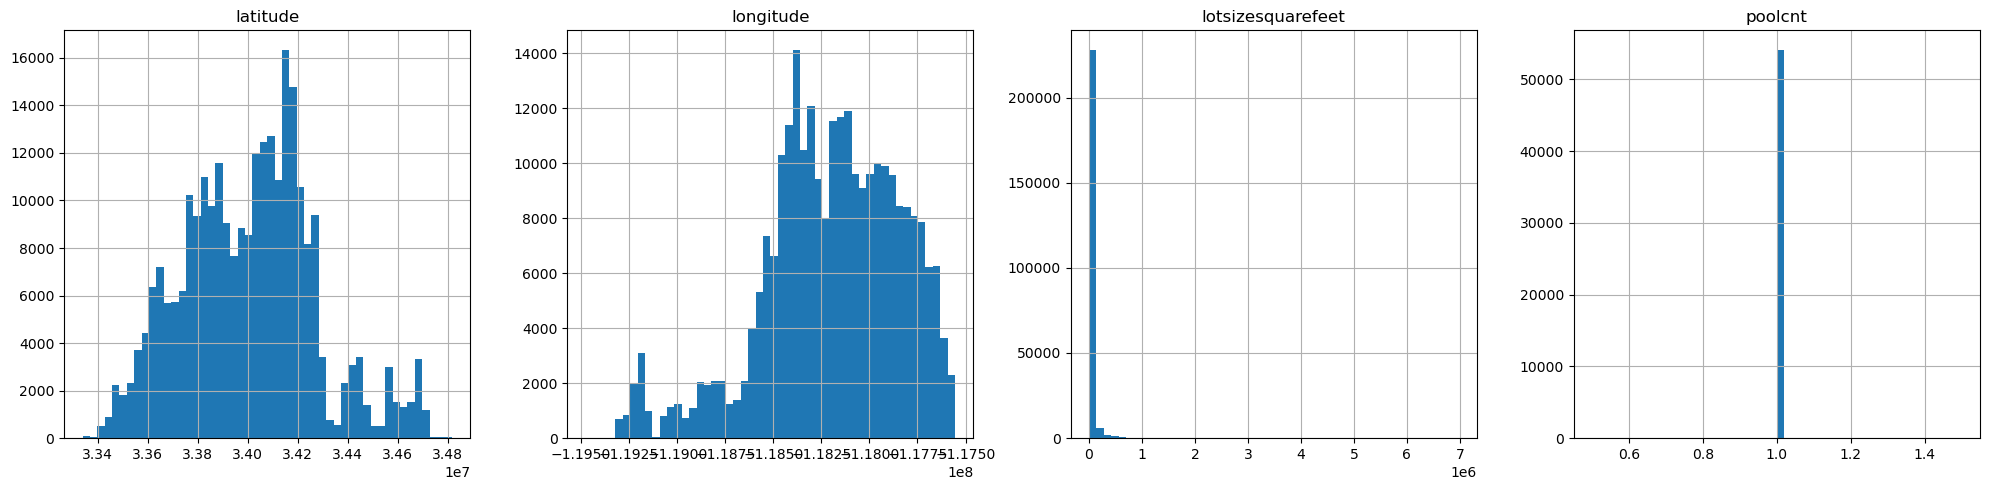

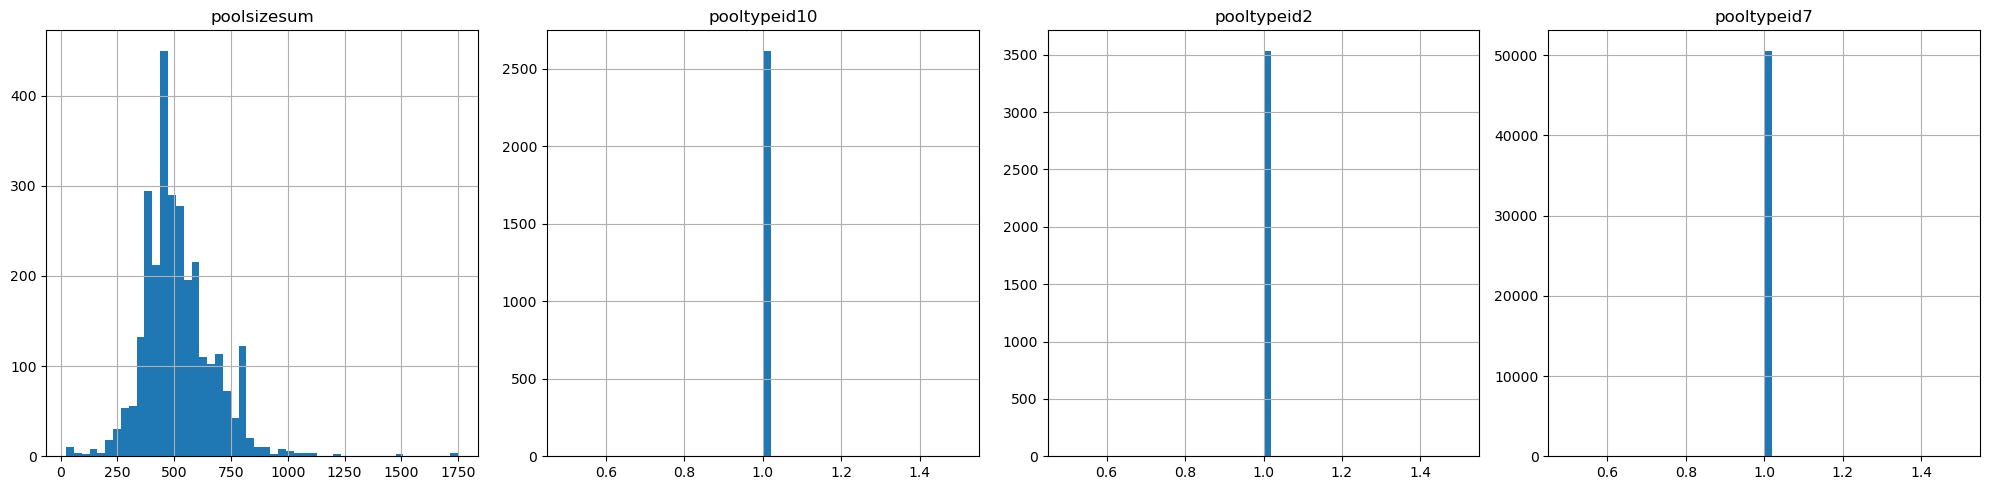

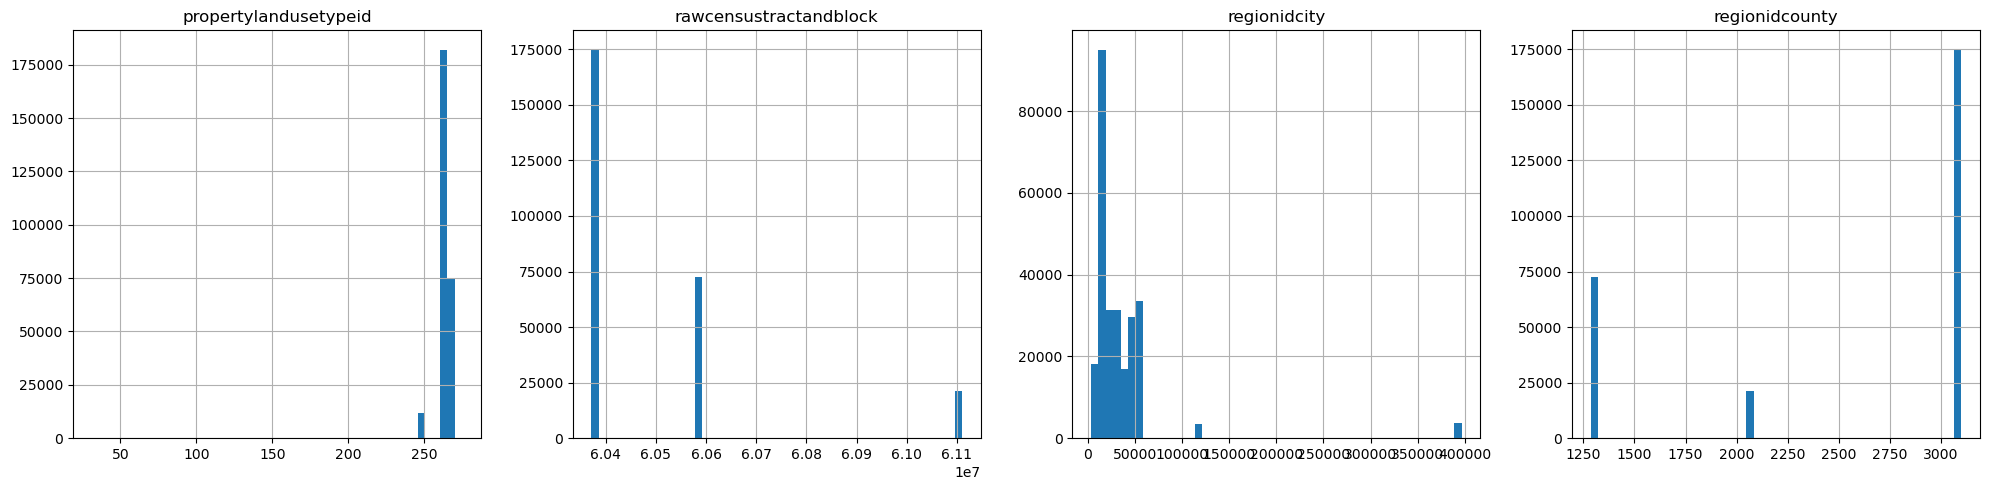

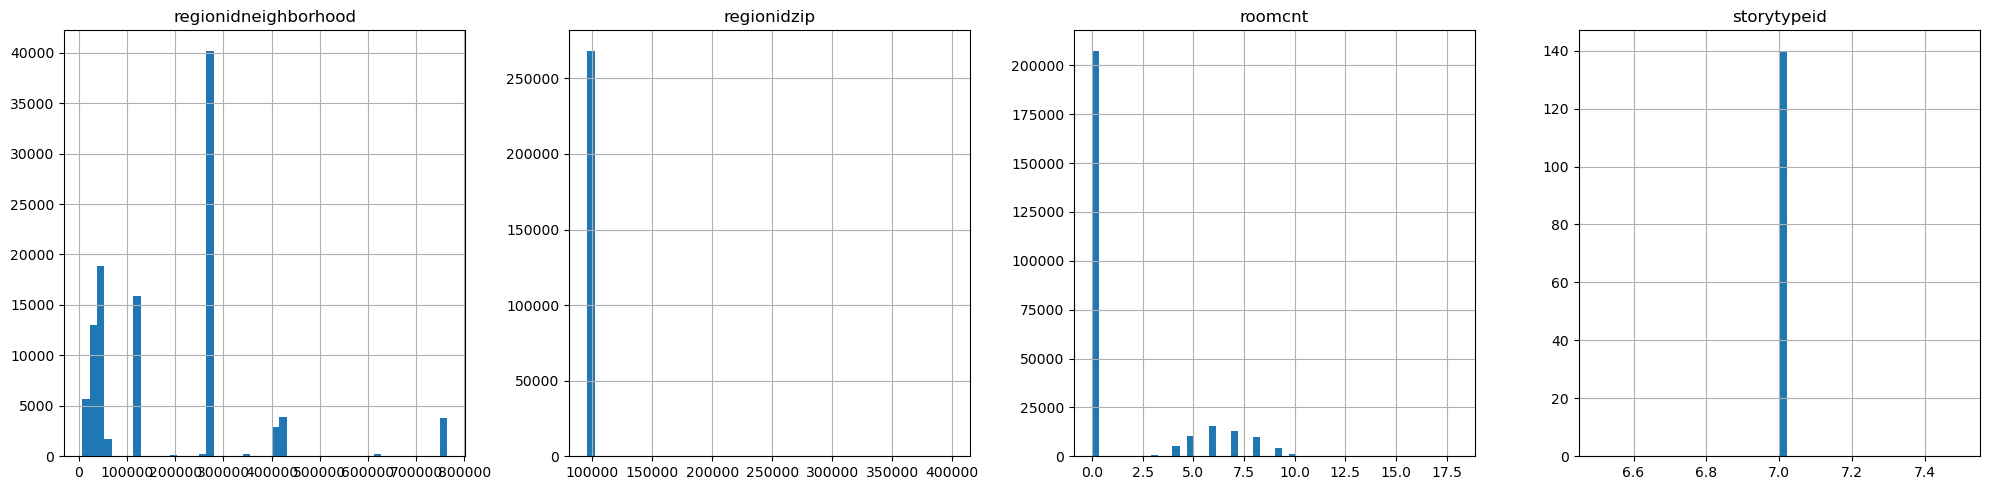

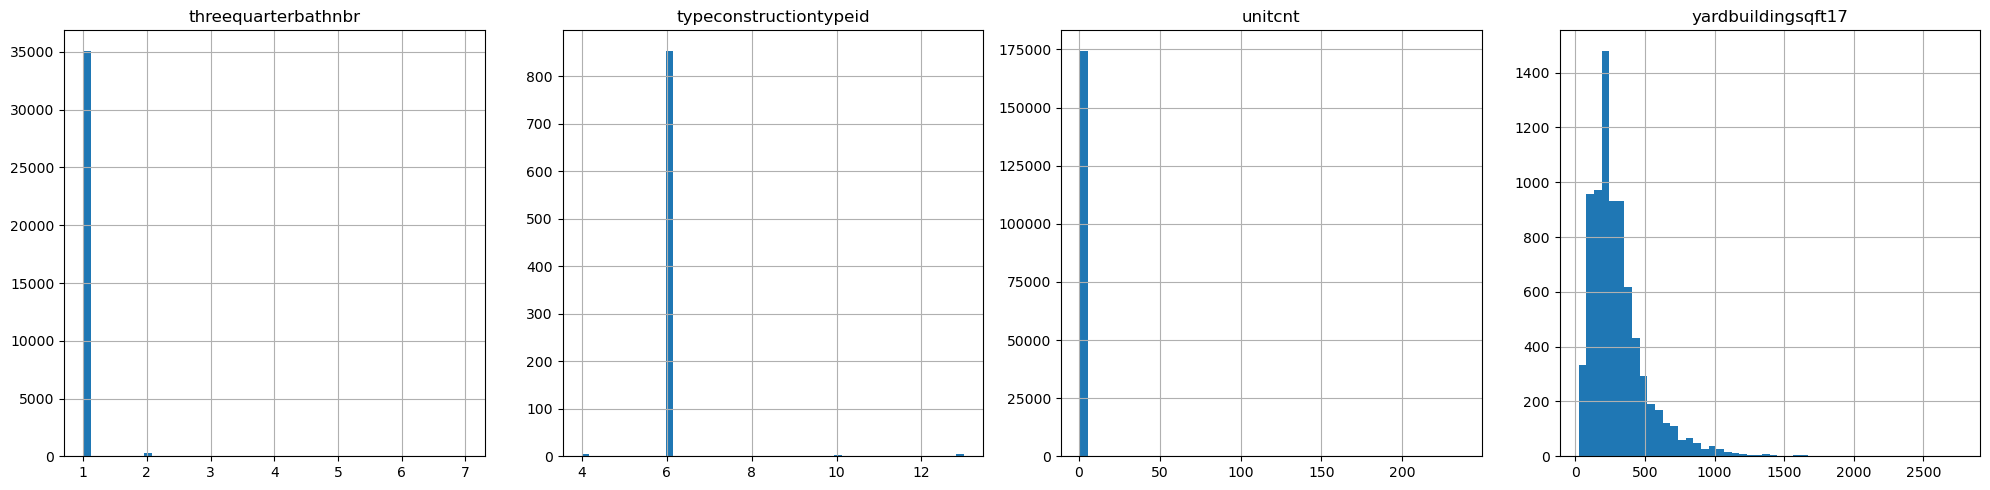

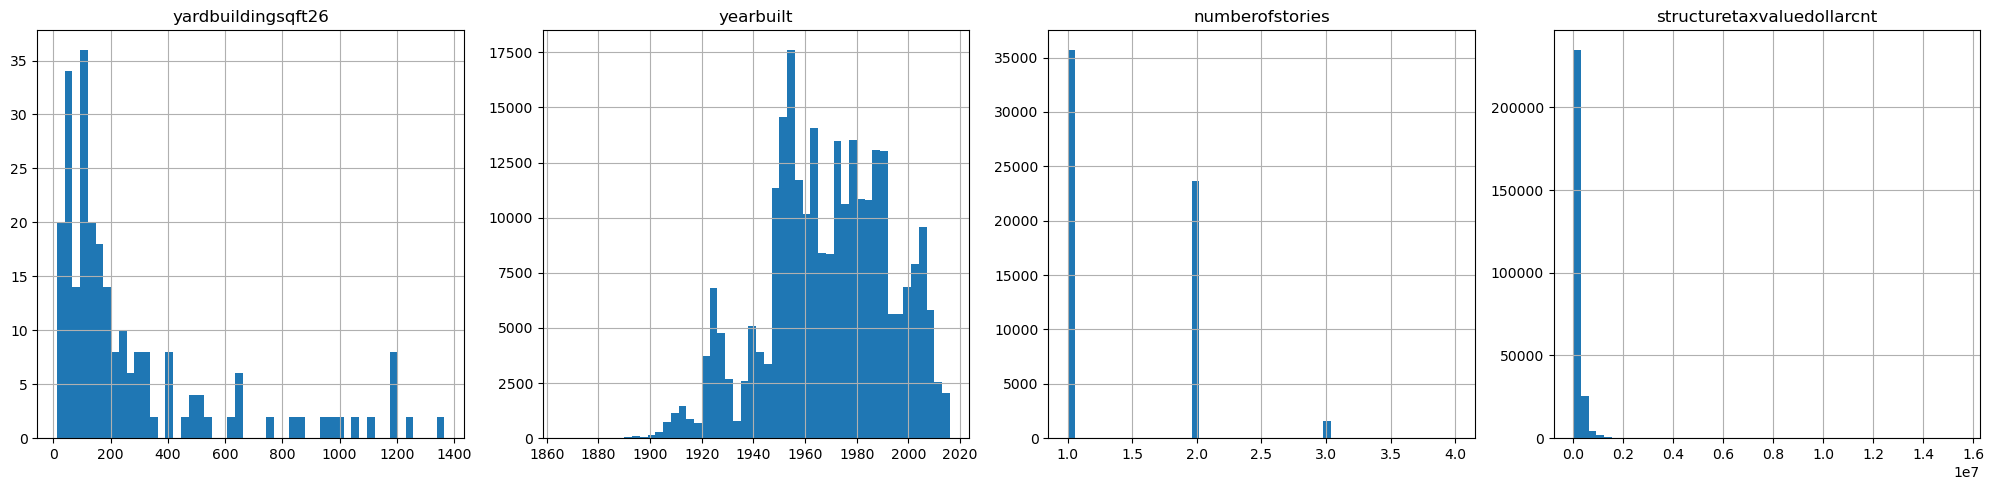

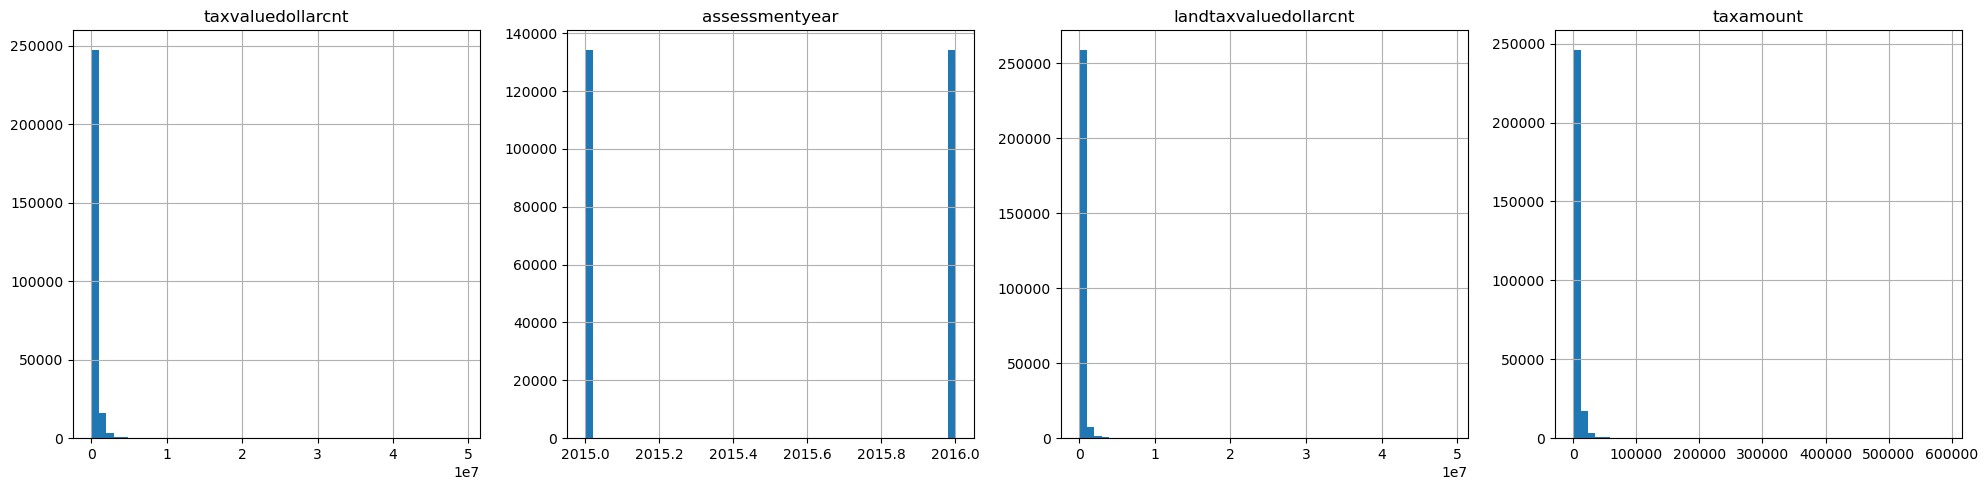

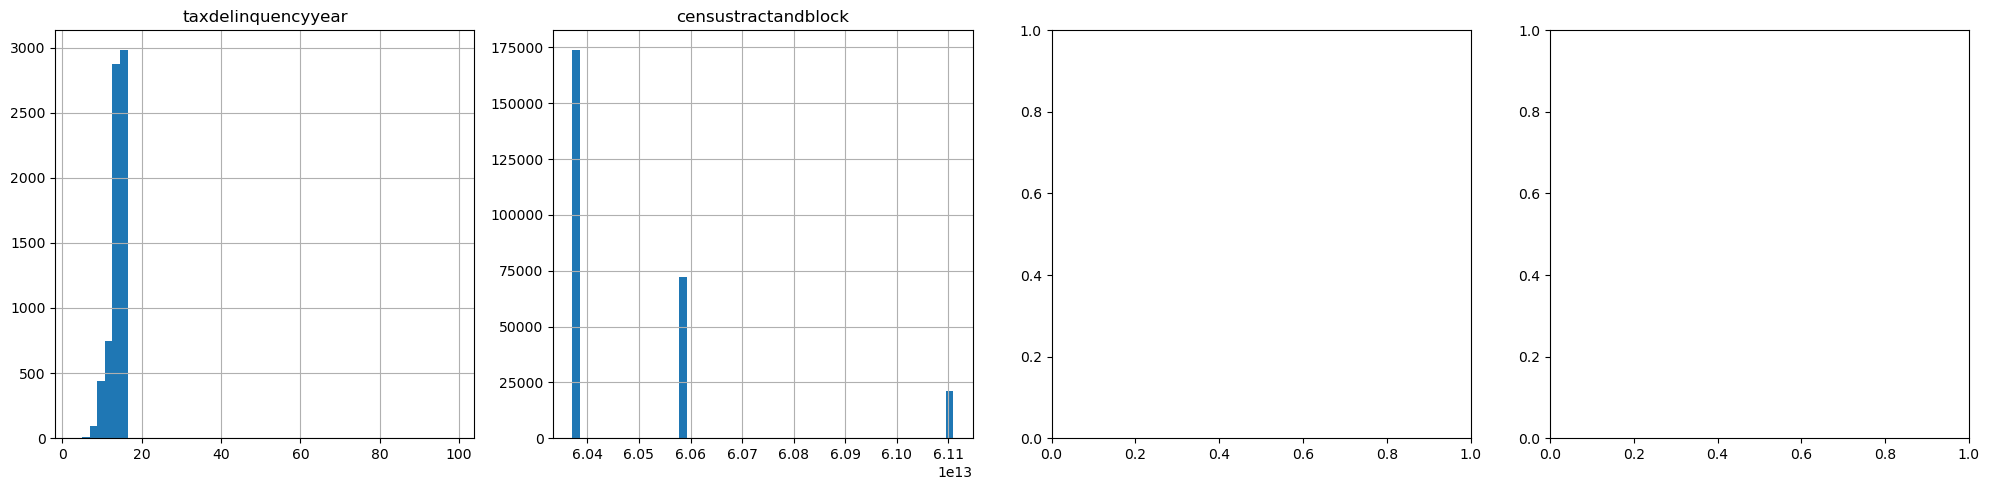

In [20]:
## Distribution of non-categorical 
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Plot 4 histograms at a time
for i in range(0, len(num_cols), 4):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for j, col in enumerate(num_cols[i:i+4]):
        train_df[col].hist(bins=50, ax=axes[j])
        axes[j].set_title(col)
    plt.tight_layout()
    plt.show()

# Visualizing Geospatial Data

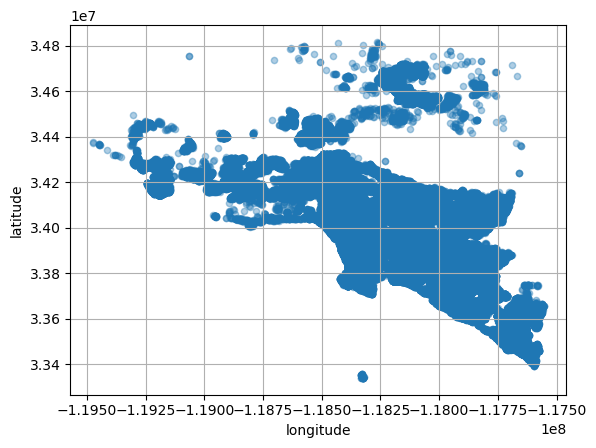

In [21]:
train_df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

In [24]:
# Remove rows with NaN values in 'latitude', 'longitude', or 'logerror'
train_df_clean_latlong = train_df.dropna(subset=['latitude', 'longitude', 'logerror'])

# Ensure latitude and longitude are in correct range and are floats
train_df_clean_latlong['latitude'] = train_df_clean_latlong['latitude'] / 1e6
train_df_clean_latlong['longitude'] = train_df_clean_latlong['longitude'] / 1e6

# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude'], row['logerror']] for index, row in train_df_clean_latlong.iterrows()]

# Create a map centered around California
m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Add HeatMap layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)

# Save the map to an HTML file
m.save('heatmap.html')

# Display the map in the Jupyter notebook
display(HTML('<iframe src="heatmap.html" width="100%" height="600"></iframe>'))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning:

Consider using IPython.display.IFrame instead



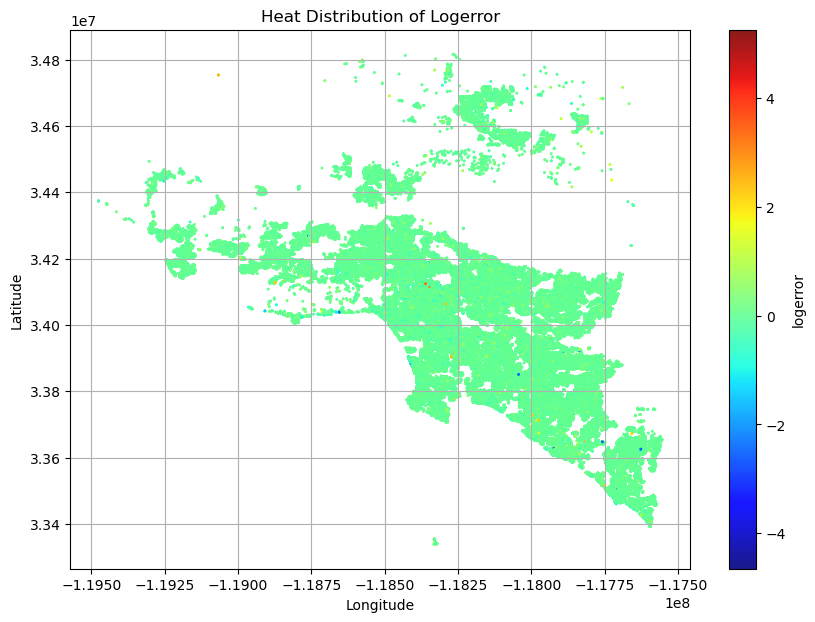

In [25]:
# plotting using the logerror 
# Remove rows with NaN values in 'latitude', 'longitude', or 'logerror'
prop_data_clean = train_df.dropna(subset=['latitude', 'longitude', 'logerror'])

# Create the scatter plot
plt.figure(figsize=(10, 7))
sc = plt.scatter(x=prop_data_clean['longitude'], y=prop_data_clean['latitude'],
                 c=prop_data_clean['logerror'], cmap='jet', alpha=0.9, s=1)

# Add color bar
plt.colorbar(sc, label='logerror')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heat Distribution of Logerror')

# Show grid
plt.grid(True)

# Show plot
plt.show()

# Maps stuff (Markers)

In [26]:
#  # Remove rows with NaN values in 'latitude', 'longitude', or 'logerror'
# train_df_clean_latlong = train_df.dropna(subset=['latitude', 'longitude', 'logerror'])

# # Ensure latitude and longitude are in correct range and are floats
# train_df_clean_latlong['latitude'] = train_df_clean_latlong['latitude'] / 1e6
# train_df_clean_latlong['longitude'] = train_df_clean_latlong['longitude'] / 1e6

# # Normalize the logerror for colormap
# norm = colors.Normalize(vmin=train_df_clean_latlong['logerror'].min(), vmax=train_df_clean_latlong['logerror'].max())
# colormap = cm.ScalarMappable(norm=norm, cmap='jet')

# # Create a map centered around California
# m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# # Add points to the map using MarkerCluster for better performance
# marker_cluster = MarkerCluster().add_to(m)

# for idx, row in train_df_clean_latlong.iterrows():
#     color = colors.to_hex(colormap.to_rgba(row['logerror']))
#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=5,
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.7,
#         popup=f"Latitude: {row['latitude']}, Longitude: {row['longitude']}, Logerror: {row['logerror']}"
#     ).add_to(marker_cluster)

# # Save the map to an HTML file
# m.save('heatmap_logerror.html')

# print("Map has been saved to 'heatmap_logerror.html'.")

# Logerror Dist.

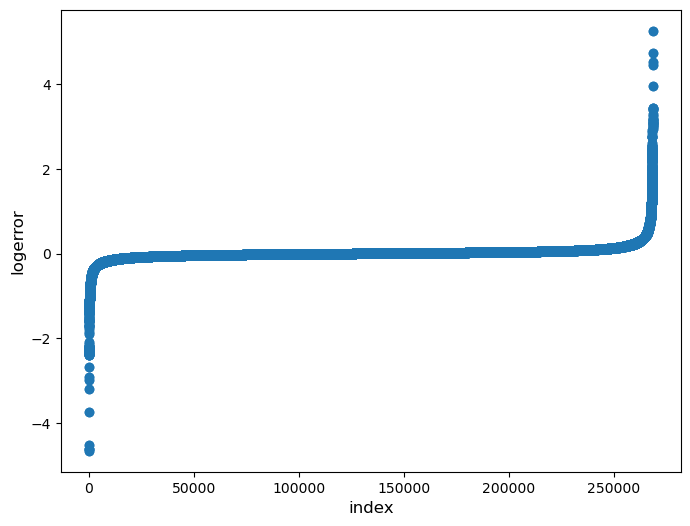

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

# Correlation

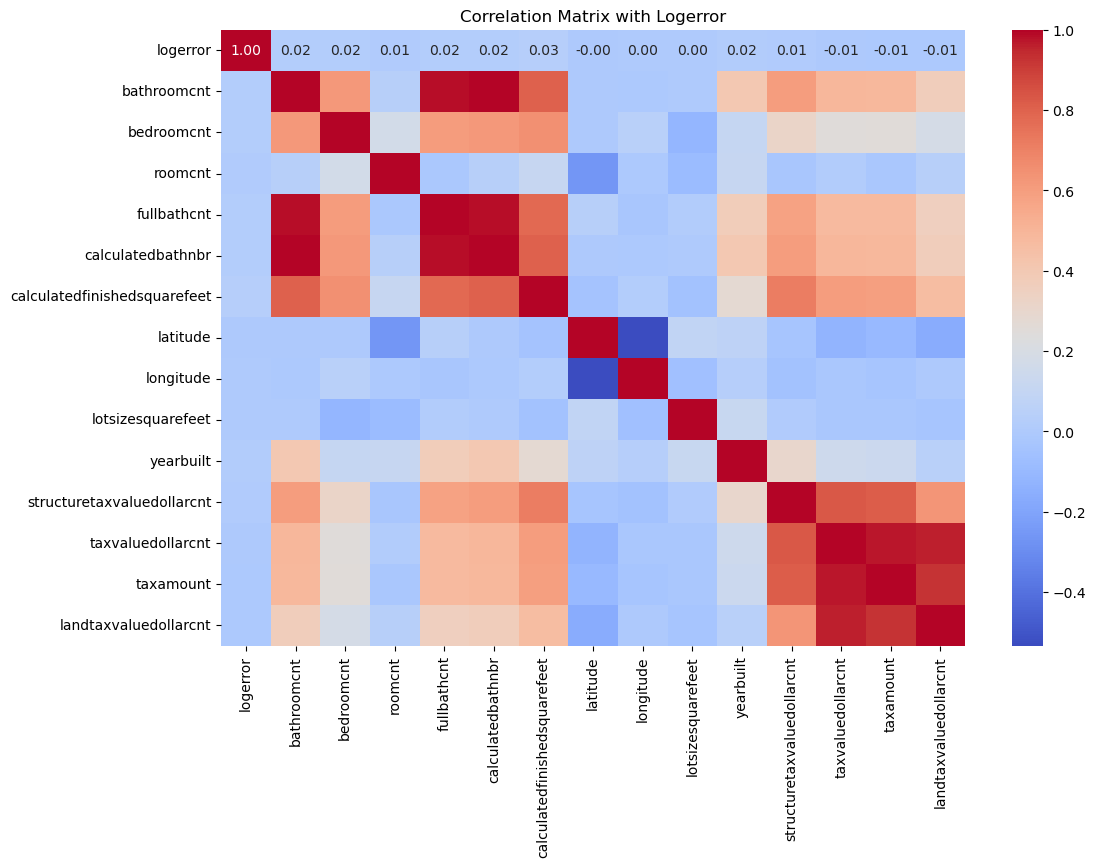

In [28]:
# Define the selected features
features = [
    'logerror', 'bathroomcnt', 'bedroomcnt', 'roomcnt', 'fullbathcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
    'latitude', 'longitude', 'lotsizesquarefeet', 'yearbuilt',
    'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount', 'landtaxvaluedollarcnt',
]

# Exclude the following 
# fips

# Dropping rows with NaN values in the selected features
prop_data_clean = train_df[features].dropna()

# Calculate the correlation matrix
correlation_matrix = prop_data_clean.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Logerror')
plt.show()

# Plotting the scatter matrix
# scatter_matrix(prop_data_clean[features], figsize=(15, 15), alpha=0.2)
plt.show()

# Exploring Features 

In [29]:
def feature_info(df, feature_name):
    """
    Prints information about a specific feature in the dataframe, including data type,
    percentage of missing values, count of each unique value, and a histogram of the distribution of the data.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    feature_name (str): The name of the feature to analyze.
    """
    
    # Check if the feature exists in the dataframe
    if feature_name not in df.columns:
        print(f"Feature '{feature_name}' not found in the dataframe.")
        return
    
    # Data type
    dtype = df[feature_name].dtype
    print(f"Data type of '{feature_name}': {dtype}")
    
    # Percentage of missing values
    missing_count = df[feature_name].isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    print(f"Percentage of missing values in '{feature_name}': {missing_percentage:.2f}%")
    
    # Print count and percentage of each unique value
    value_counts = df[feature_name].value_counts(dropna=False)
    total_count = len(df)
    print(f"Count and percentage of each unique value in '{feature_name}':")
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")
    
    # Plot histogram for numerical features
    if dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        df[feature_name].hist(bins=20)
        plt.title(f'Histogram of {feature_name}')
        plt.xlabel(feature_name)
        plt.ylabel('Frequency')
        plt.show()

Data type of 'assessmentyear': float64
Percentage of missing values in 'assessmentyear': 0.04%
Count and percentage of each unique value in 'assessmentyear':
2016.0: 134274 (49.99%)
2015.0: 134244 (49.98%)
nan: 102 (0.04%)


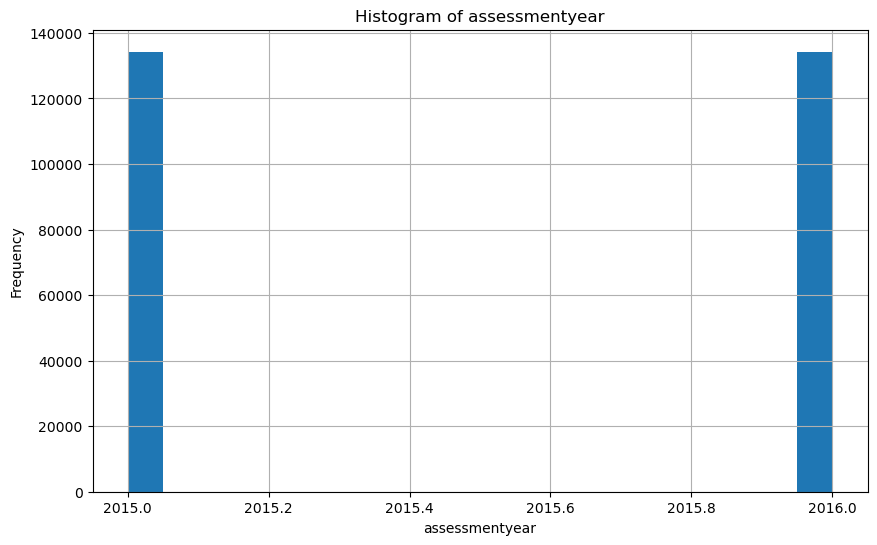

In [30]:
feature_info(train_df, "assessmentyear")

Data type of 'bathroomcnt': float64
Percentage of missing values in 'bathroomcnt': 0.04%
Count and percentage of each unique value in 'bathroomcnt':
2.0: 109130 (40.63%)
3.0: 59233 (22.05%)
1.0: 45134 (16.80%)
2.5: 23578 (8.78%)
4.0: 11307 (4.21%)
1.5: 4883 (1.82%)
5.0: 3431 (1.28%)
3.5: 3353 (1.25%)
0.0: 2758 (1.03%)
4.5: 2407 (0.90%)
6.0: 1375 (0.51%)
5.5: 772 (0.29%)
7.0: 434 (0.16%)
8.0: 357 (0.13%)
6.5: 164 (0.06%)
nan: 102 (0.04%)
9.0: 99 (0.04%)
10.0: 37 (0.01%)
7.5: 35 (0.01%)
11.0: 10 (0.00%)
12.0: 7 (0.00%)
8.5: 5 (0.00%)
20.0: 2 (0.00%)
15.0: 2 (0.00%)
18.0: 2 (0.00%)
13.0: 2 (0.00%)
10.5: 1 (0.00%)


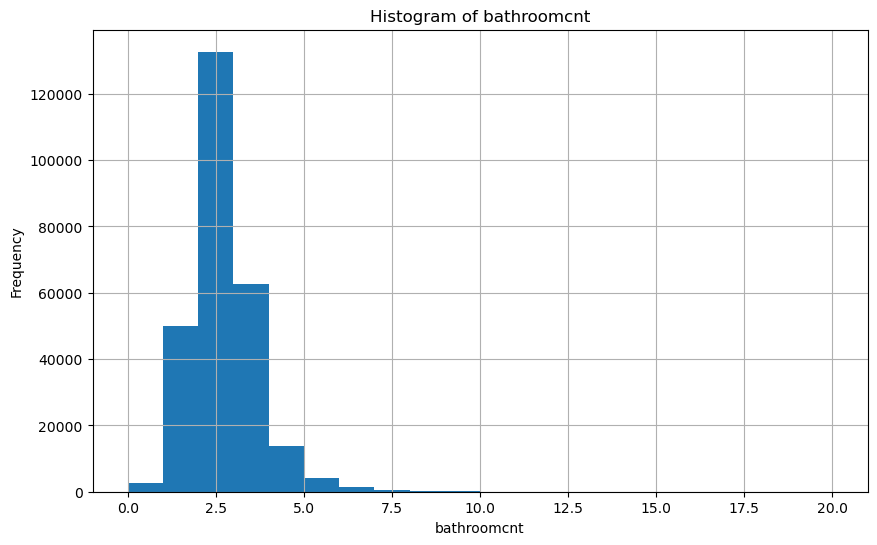

In [31]:
feature_info(train_df, "bathroomcnt")

# IQR Stuff

/var/folders/m3/jn87_n2s6cnbxdsks7gkhs7m0000gn/T/ipykernel_10160/1977645628.py:1: DtypeWarning:

Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.



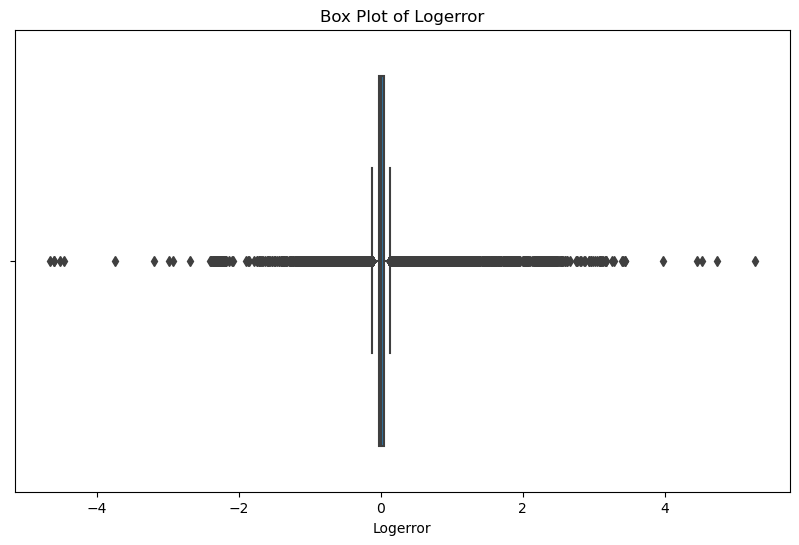

Lower cutoff for outliers: -0.12205
Upper cutoff for outliers: 0.13595000000000002
Number of outliers based on IQR: 19772


In [38]:
properties_2016_ = pd.read_csv(f'{base_path}properties_2016.csv')
prop_data_2016 = pd.merge(df_logs, properties_2016_, on='parcelid', how='inner')


# Create a box plot for logerror
plt.figure(figsize=(10, 6))
sns.boxplot(x=prop_data_2016['logerror'])
plt.title('Box Plot of Logerror')
plt.xlabel('Logerror')
plt.show()

# Calculate the IQR to find the potential cutoff for outliers
Q1 = prop_data_2016['logerror'].quantile(0.25)
Q3 = prop_data_2016['logerror'].quantile(0.75)
IQR = Q3 - Q1

# Define cutoffs for outliers
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR

print(f'Lower cutoff for outliers: {lower_cutoff}')
print(f'Upper cutoff for outliers: {upper_cutoff}')

# Filter the outliers based on the IQR method
outliers_iqr = prop_data_2016[(prop_data_2016['logerror'] < lower_cutoff) | (prop_data_2016['logerror'] > upper_cutoff)]

# Display basic information about the outliers
print("Number of outliers based on IQR:", len(outliers_iqr))
outliers_iqr.describe()

# Save the outliers to a new DataFrame
outliers_iqr_df = outliers_iqr.copy()

Number of outliers: 19772


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



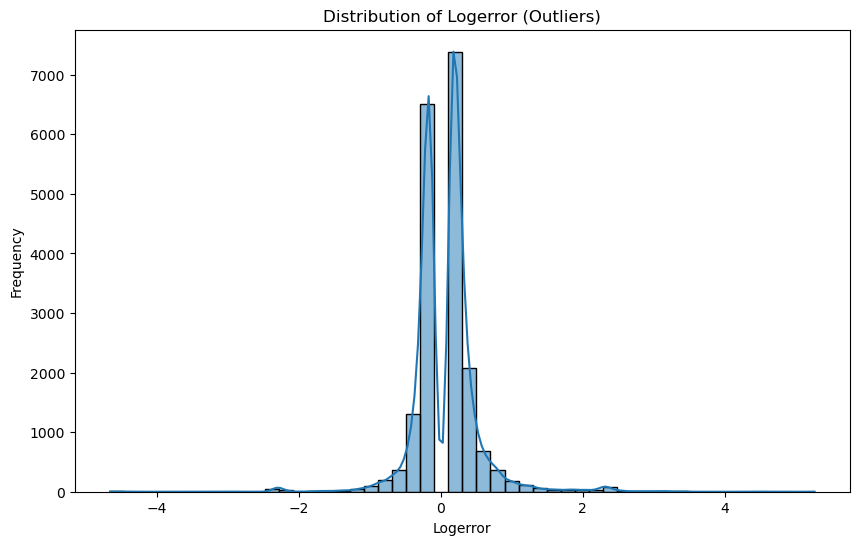

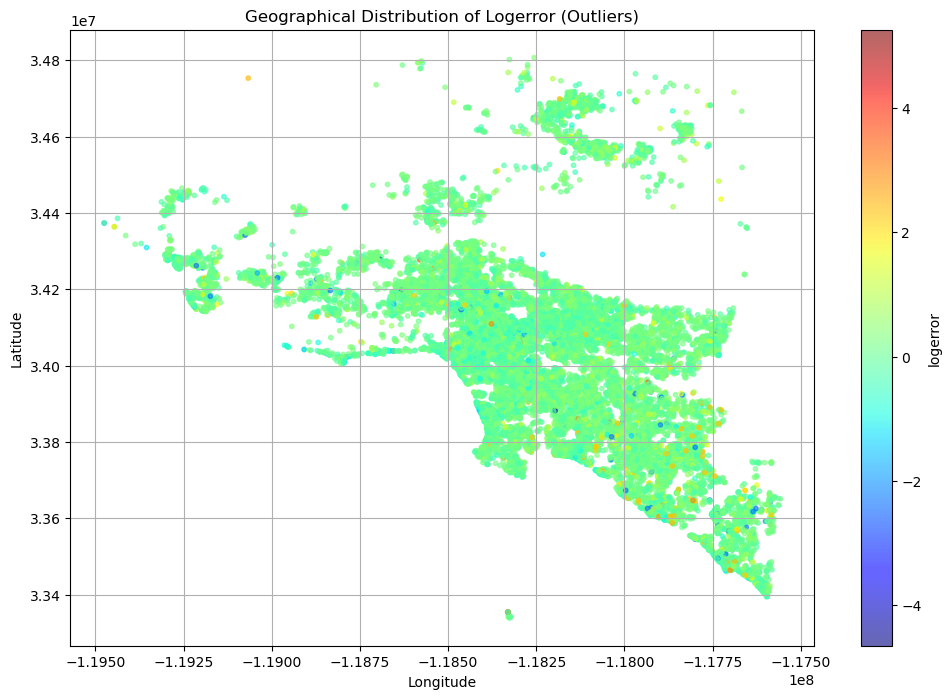

In [39]:
# Filter the outliers
outliers = prop_data_2016[(prop_data_2016['logerror'] > upper_cutoff) | (prop_data_2016['logerror'] < lower_cutoff)]

# Display basic information about the outliers
print("Number of outliers:", len(outliers))
outliers.describe()

# Save the outliers to a new DataFrame
outliers_df = outliers.copy()

# Histogram of logerror for outliers
plt.figure(figsize=(10, 6))
sns.histplot(outliers_df['logerror'], bins=50, kde=True)
plt.title('Distribution of Logerror (Outliers)')
plt.xlabel('Logerror')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of latitude vs longitude color-coded by logerror
plt.figure(figsize=(12, 8))
sc = plt.scatter(x=outliers_df['longitude'], y=outliers_df['latitude'],
                 c=outliers_df['logerror'], cmap='jet', alpha=0.6, s=10)
plt.colorbar(sc, label='logerror')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Logerror (Outliers)')
plt.grid(True)
plt.show()

# Save the outliers DataFrame to a CSV file for further analysis if needed
outliers_df.to_csv('outliers_logerror.csv', index=False)

# Outliers Vs. Normal Df

handling the feature: bathroomcnt


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



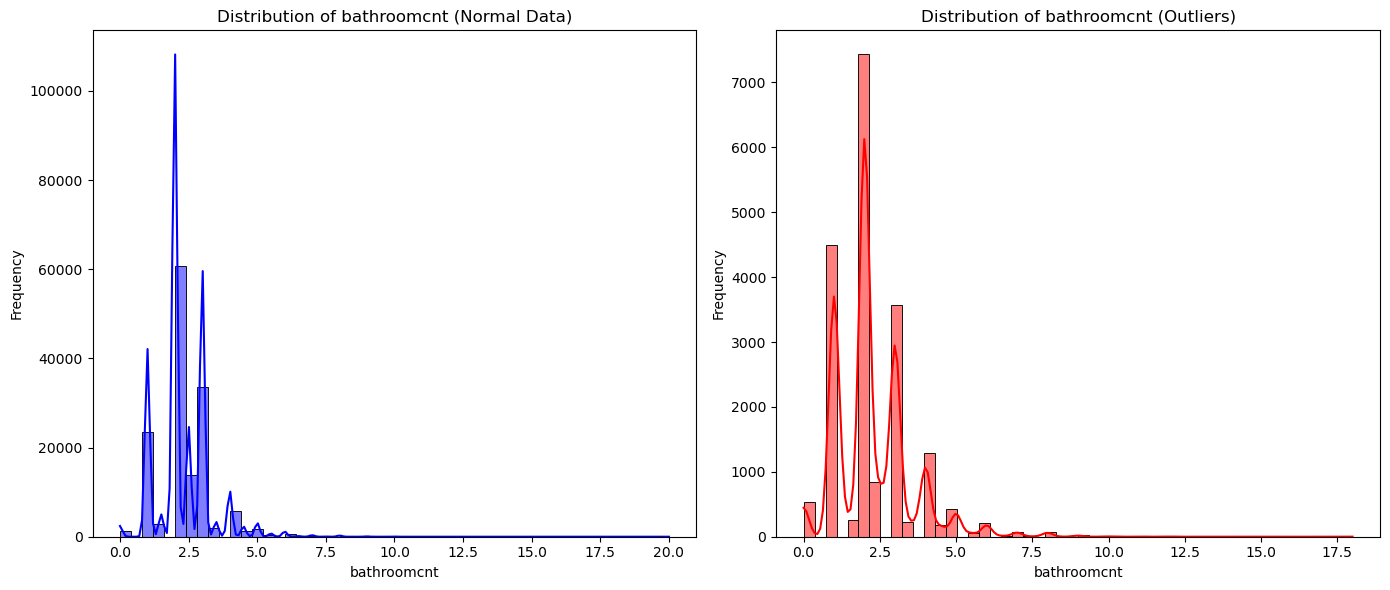

handling the feature: bedroomcnt


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



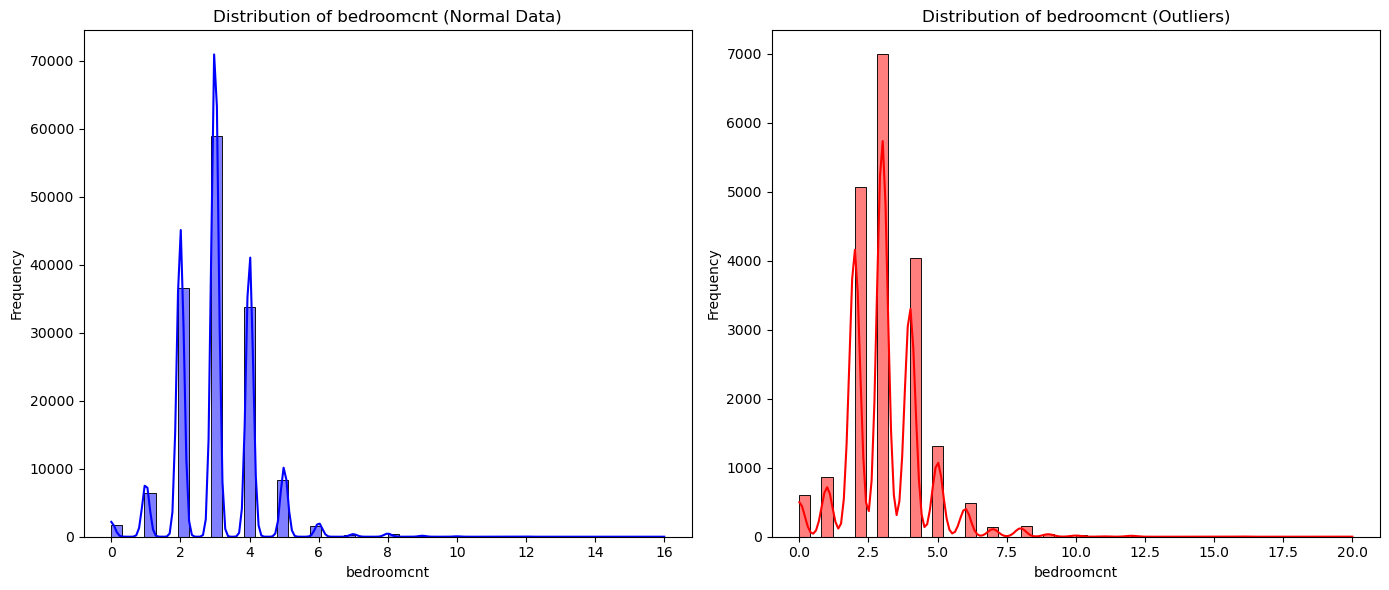

handling the feature: calculatedfinishedsquarefeet


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



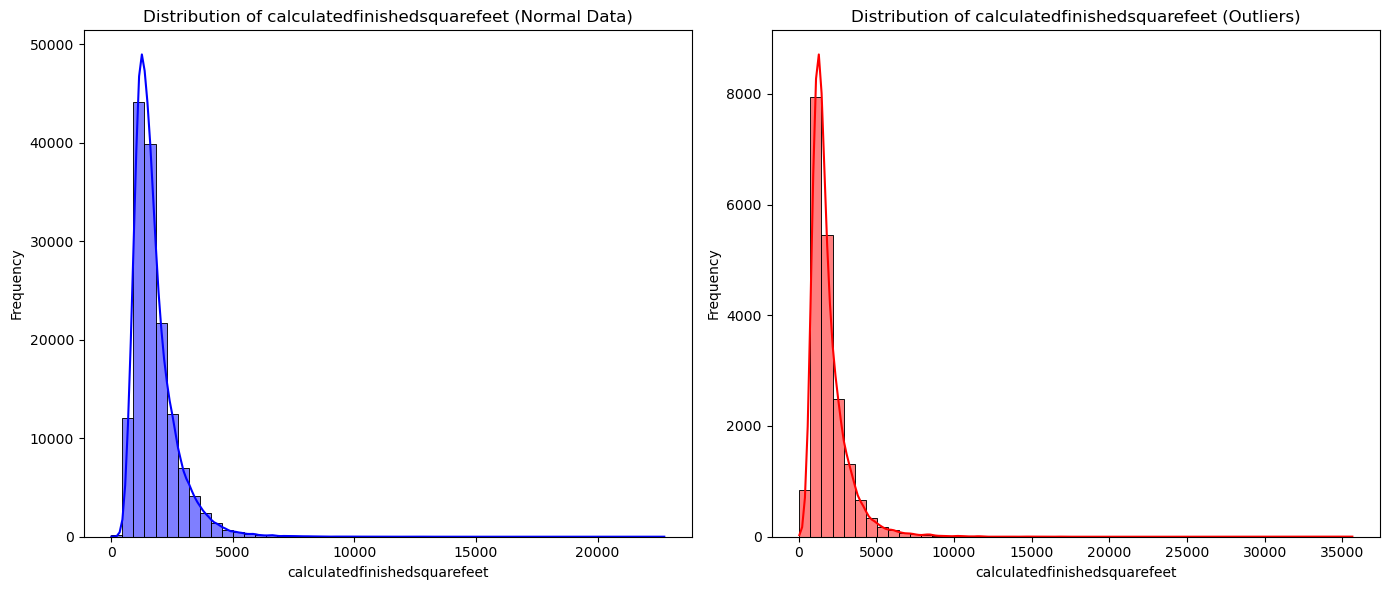

handling the feature: lotsizesquarefeet


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



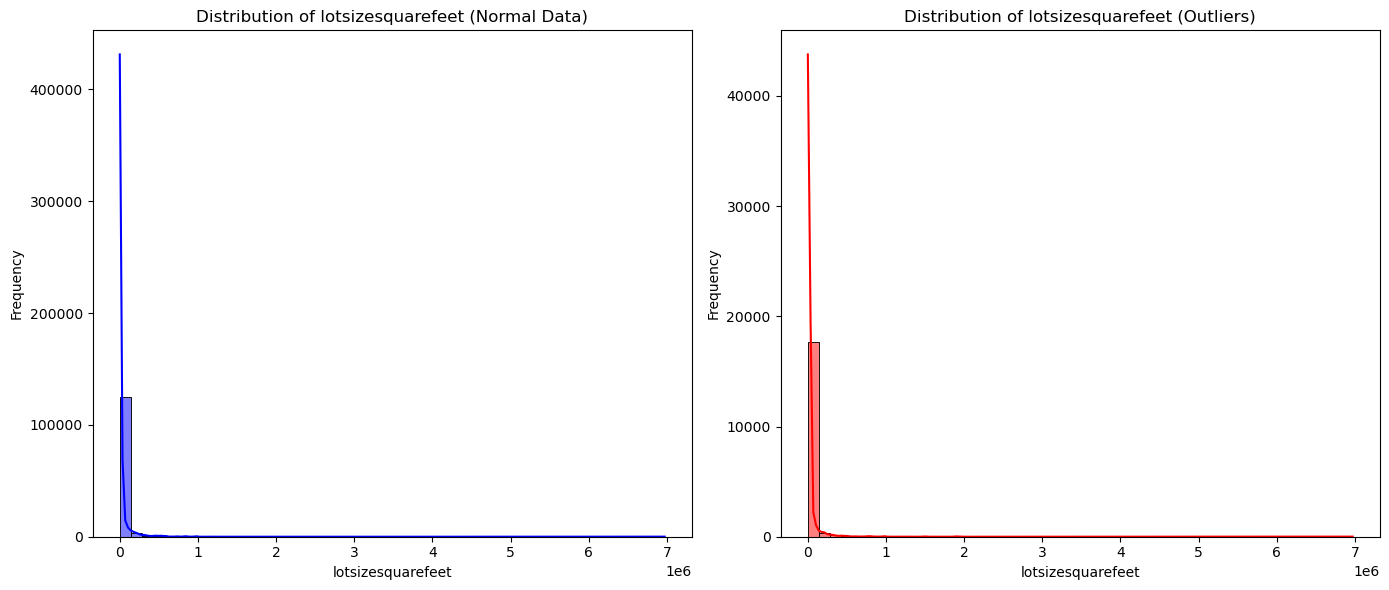

handling the feature: yearbuilt


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



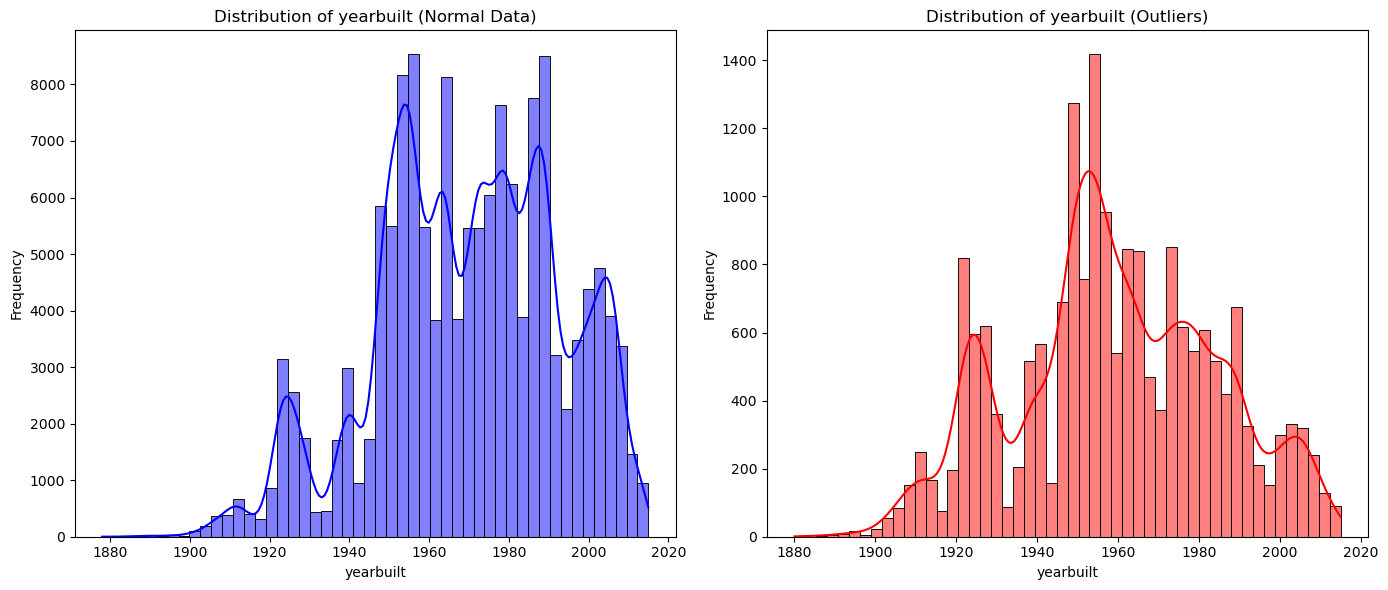

handling the feature: structuretaxvaluedollarcnt


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



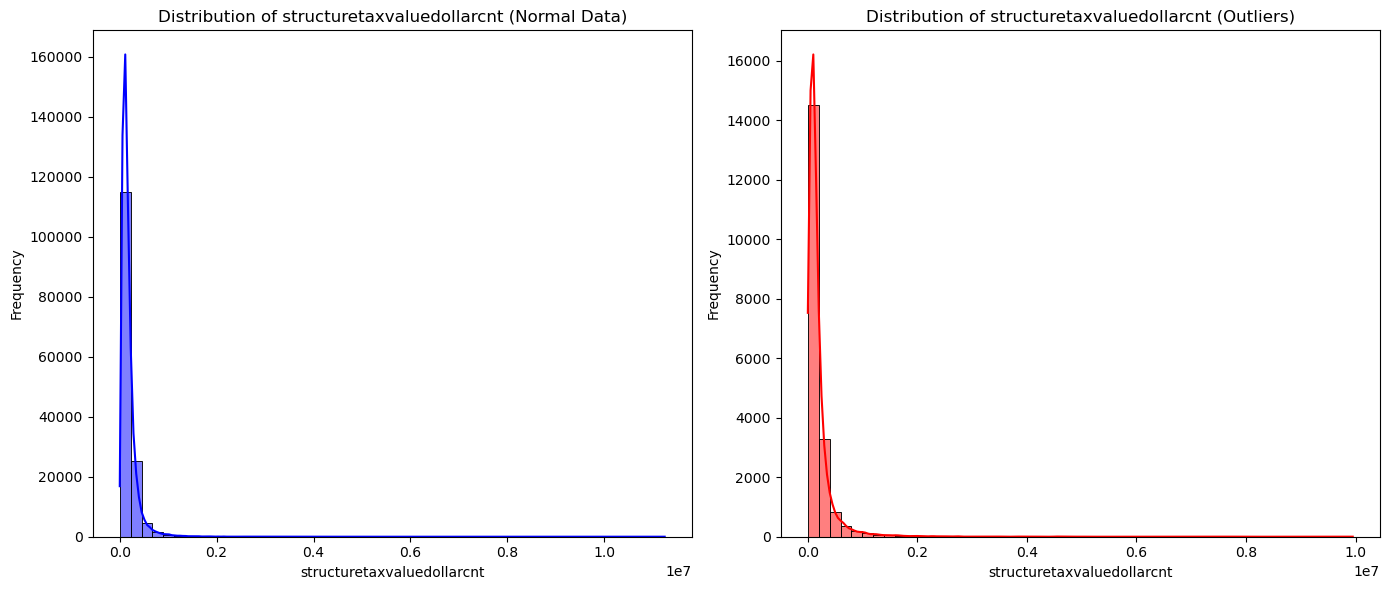

handling the feature: taxvaluedollarcnt


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



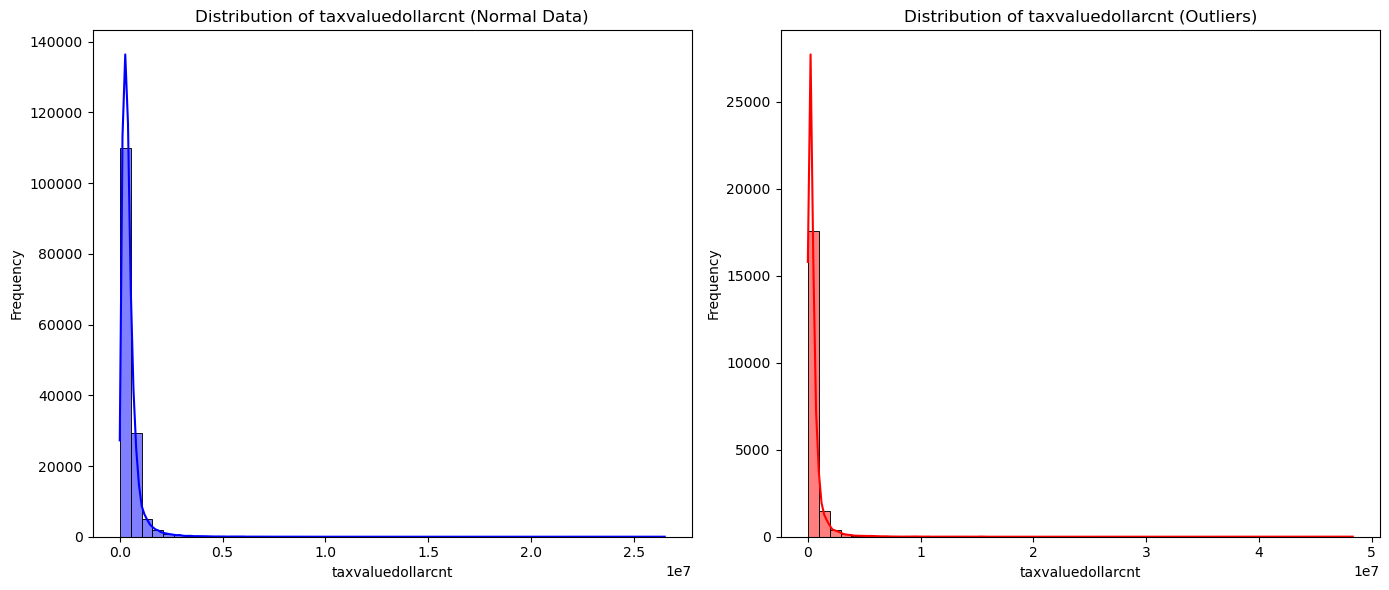

handling the feature: bathroomcnt


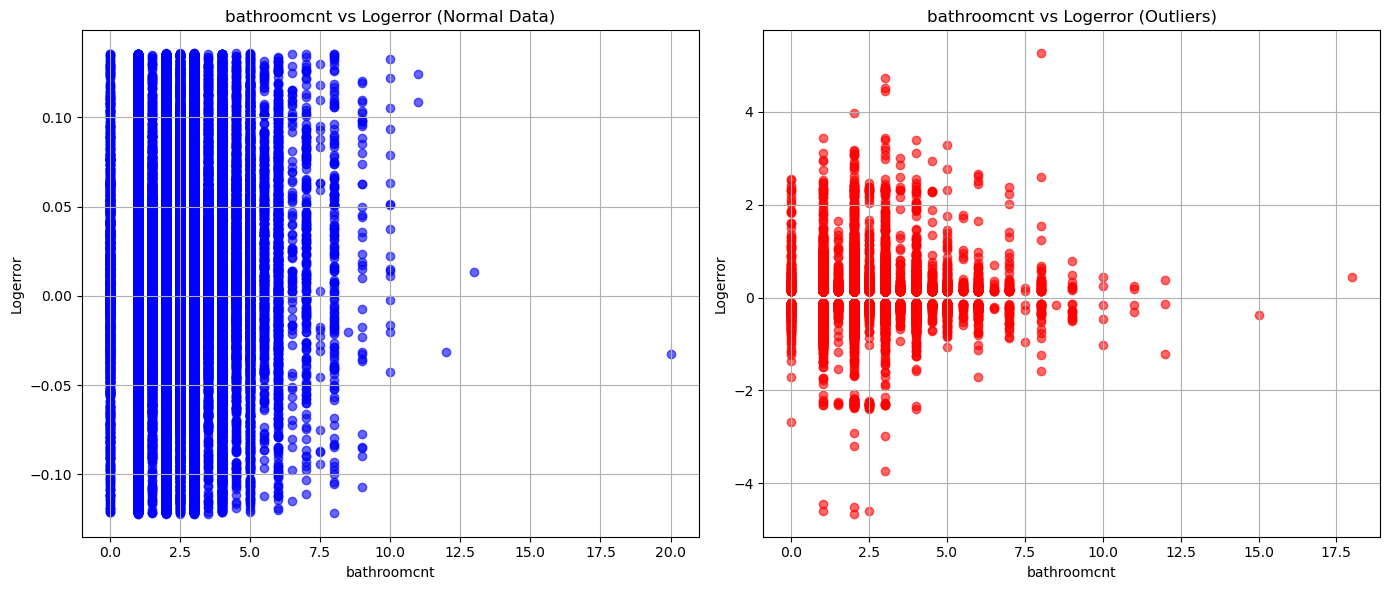

handling the feature: bedroomcnt


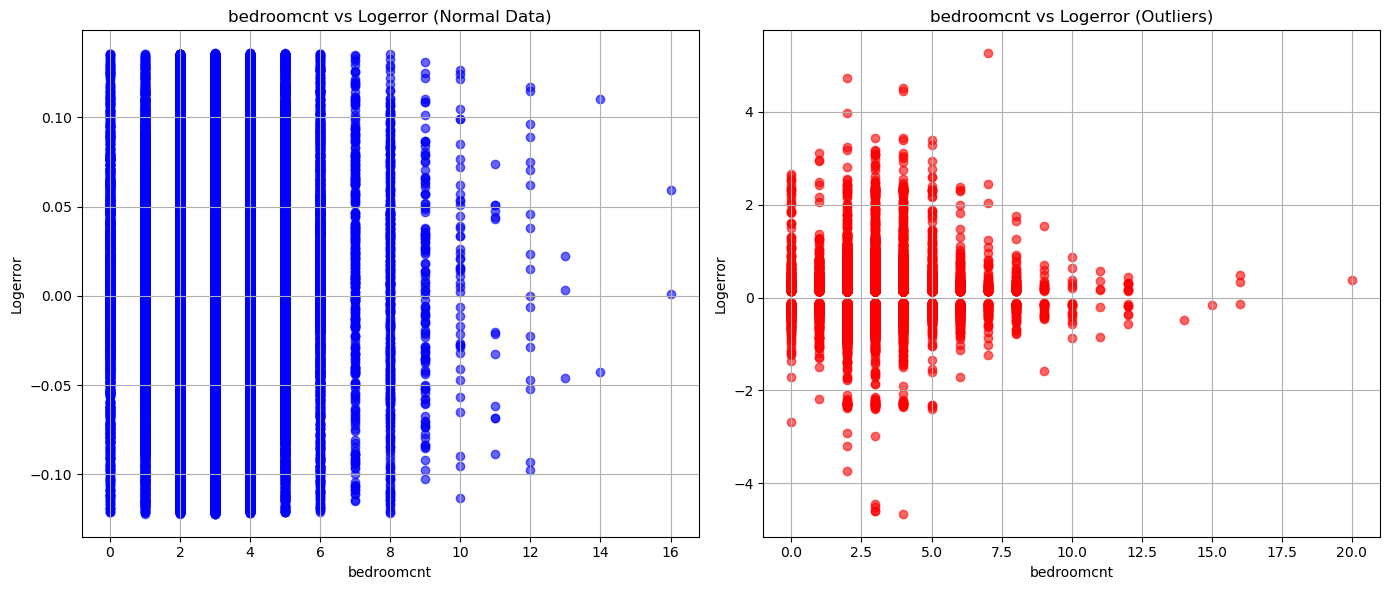

handling the feature: calculatedfinishedsquarefeet


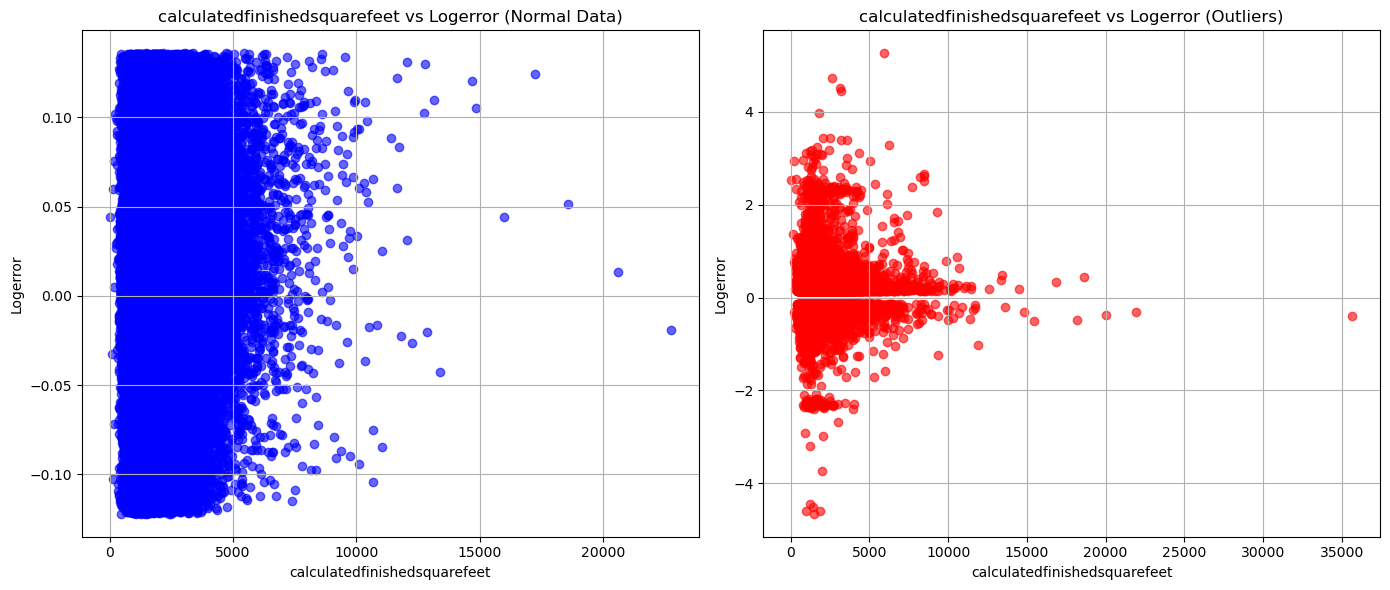

handling the feature: lotsizesquarefeet


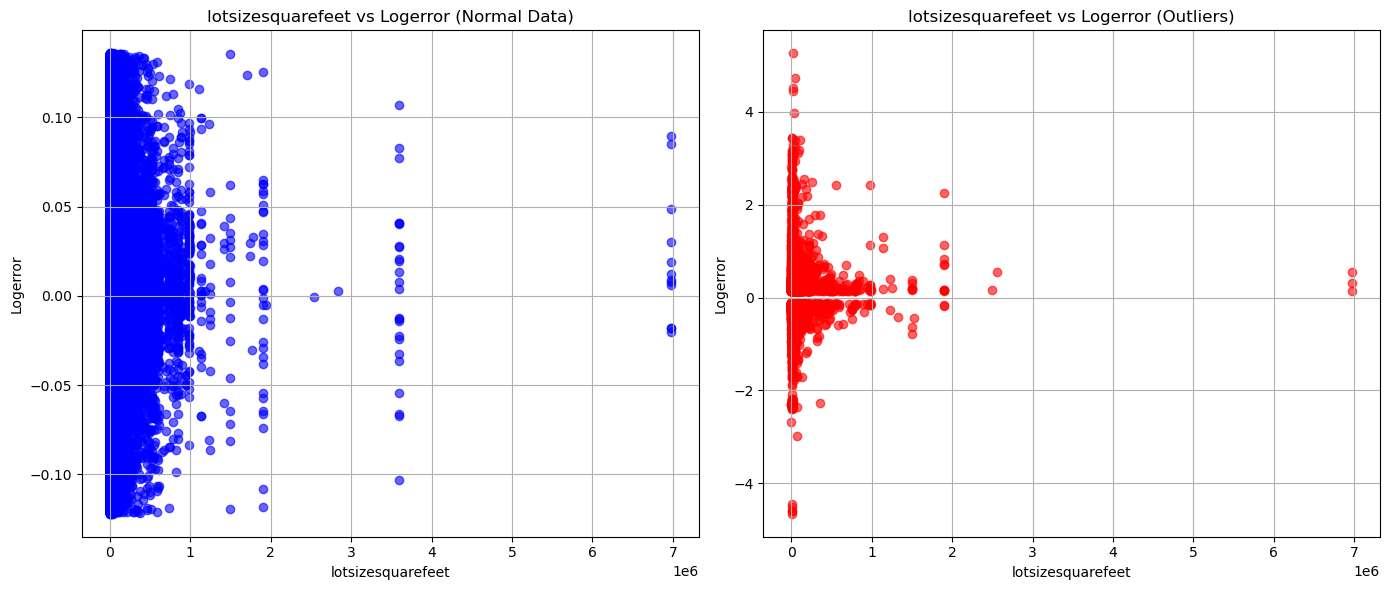

handling the feature: yearbuilt


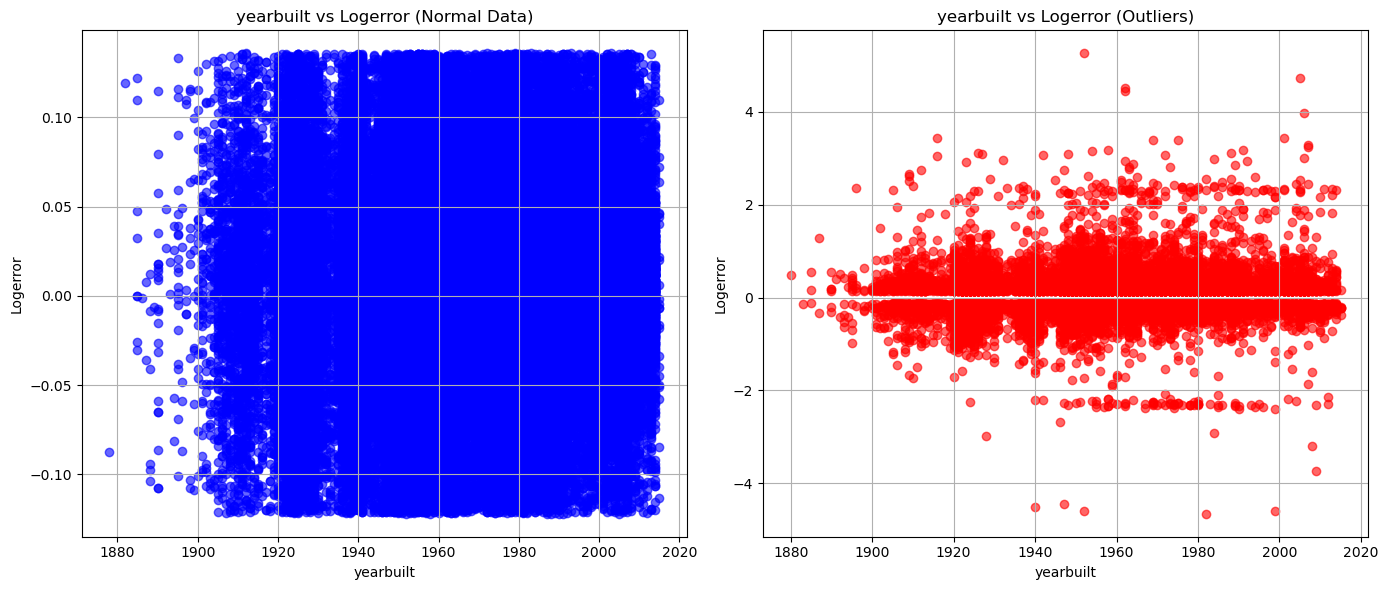

handling the feature: structuretaxvaluedollarcnt


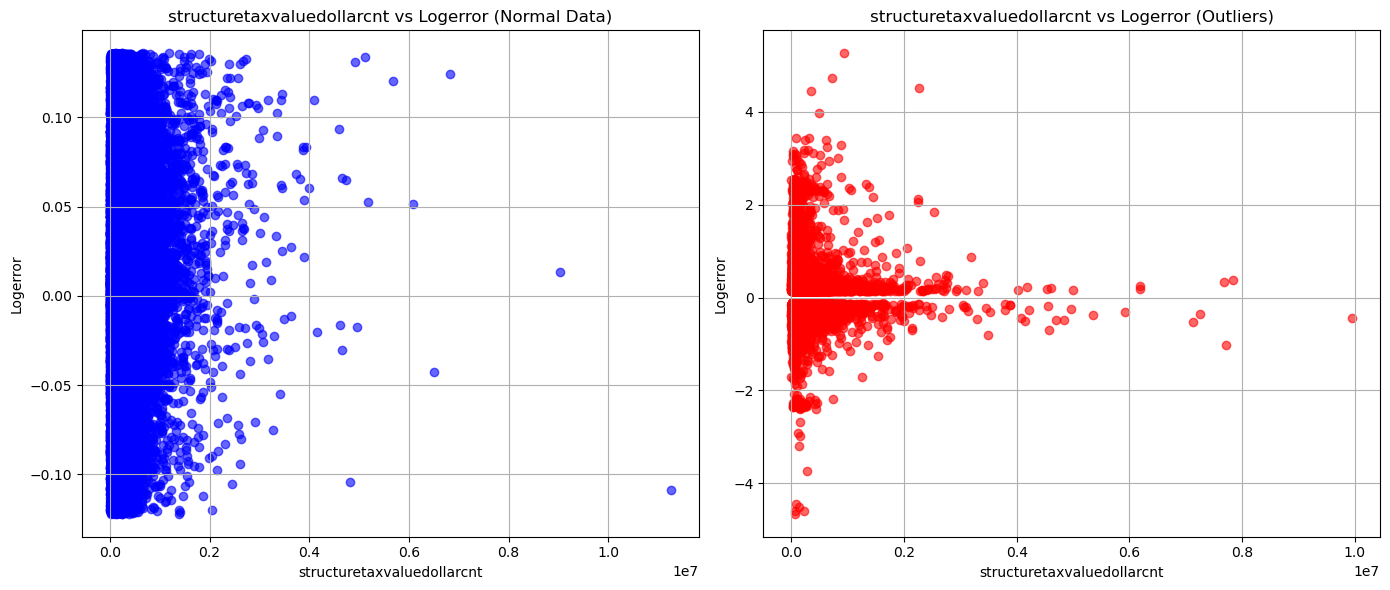

handling the feature: taxvaluedollarcnt


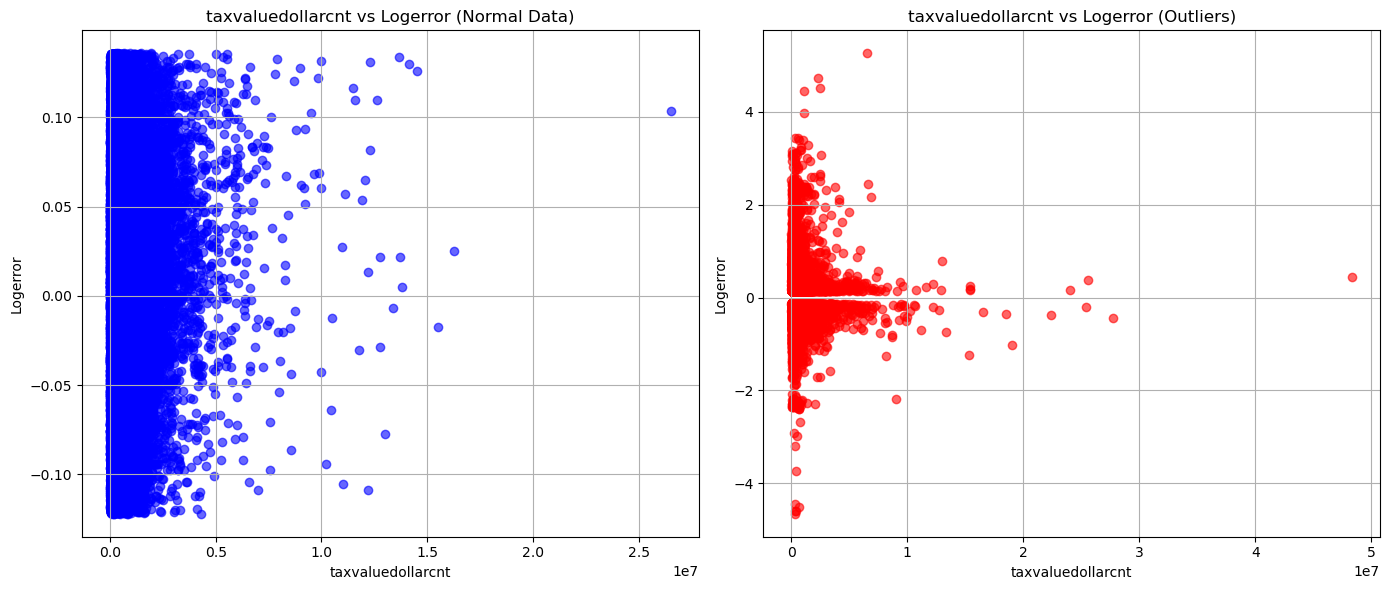

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



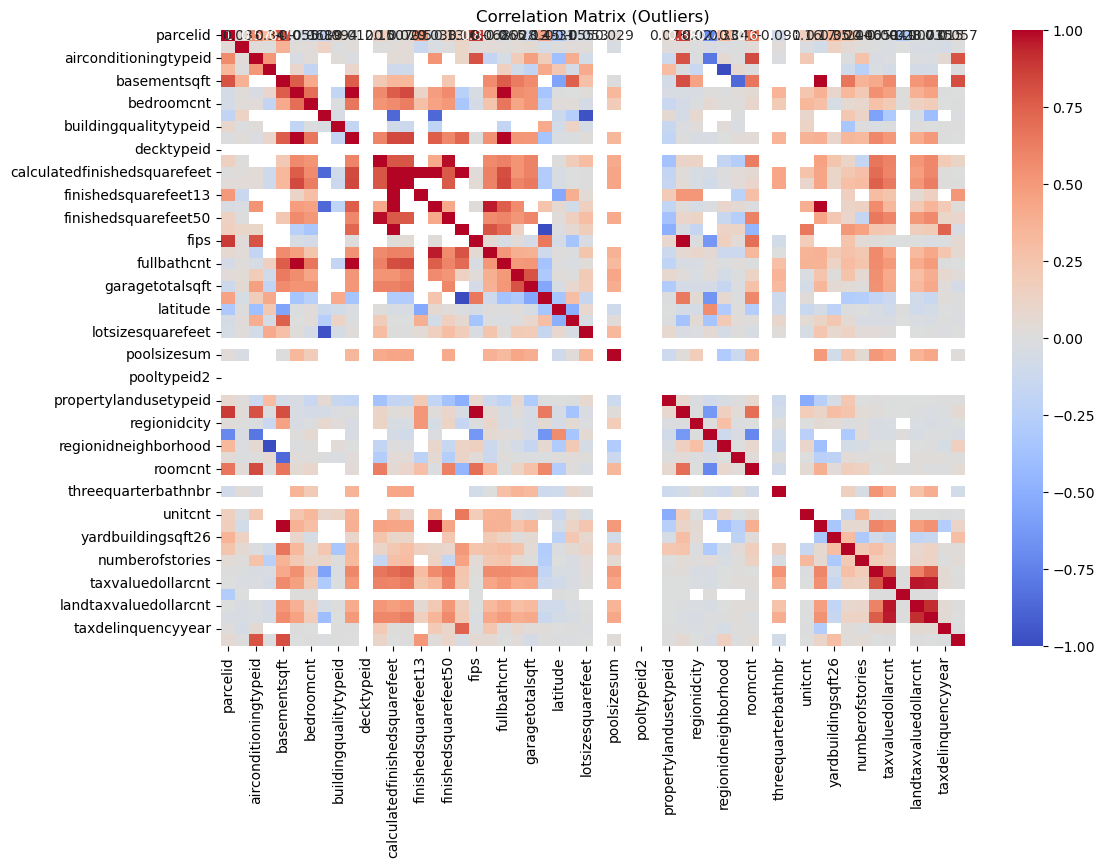

In [40]:
# Filter the outliers
outliers_df = prop_data_2016[(prop_data_2016['logerror'] < lower_cutoff) | (prop_data_2016['logerror'] > upper_cutoff)]

# Filter the normal data
normal_df = prop_data_2016[(prop_data_2016['logerror'] >= lower_cutoff) & (prop_data_2016['logerror'] <= upper_cutoff)]

# Define the key features
features = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt']

# Plot distributions side by side
for feature in features:
    print(f"handling the feature: {feature}")
    plt.figure(figsize=(14, 6))

    # Plot for normal data
    plt.subplot(1, 2, 1)
    sns.histplot(normal_df[feature], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {feature} (Normal Data)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Plot for outliers
    plt.subplot(1, 2, 2)
    sns.histplot(outliers_df[feature], bins=50, kde=True, color='red')
    plt.title(f'Distribution of {feature} (Outliers)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Scatter plots to identify relationships with logerror
for feature in features:
    print(f"handling the feature: {feature}")
    plt.figure(figsize=(14, 6))

    # Plot for normal data
    plt.subplot(1, 2, 1)
    plt.scatter(normal_df[feature], normal_df['logerror'], alpha=0.6, color='blue')
    plt.title(f'{feature} vs Logerror (Normal Data)')
    plt.xlabel(feature)
    plt.ylabel('Logerror')
    plt.grid(True)

    # Plot for outliers
    plt.subplot(1, 2, 2)
    plt.scatter(outliers_df[feature], outliers_df['logerror'], alpha=0.6, color='red')
    plt.title(f'{feature} vs Logerror (Outliers)')
    plt.xlabel(feature)
    plt.ylabel('Logerror')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Correlation matrix for outliers (numeric columns only)
numeric_cols = outliers_df.select_dtypes(include=[float, int]).columns
correlation_matrix = outliers_df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Outliers)')
plt.show()